In [1]:
import pandas as pd 
import numpy as np
import missingno as msno

In [2]:
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
world_income_distribution = pd.read_csv(r"C:\Users\Utilisateur\projet 7\data-projet7.csv", decimal=',')
world_income_distribution.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


# Nettoyage des données 

## Taille du dataframe  world_income_distribution

In [4]:
world_income_distribution.shape
# On a 11599 lignes et 6 colonnes

(11599, 6)

## Description du dataframe world_income_distribution

In [5]:
world_income_distribution.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp
count,11599.000000,11599.000000,11599.0,11599.000000,1.139900e+04
mean,2007.982757,50.500819,100.0,6069.224260,5.022128e+04
std,0.909633,28.868424,0.0,9414.185972,4.000688e+05
min,2004.000000,1.000000,100.0,16.719418,3.031931e+02
25%,2008.000000,25.500000,100.0,900.685515,2.576000e+03
50%,2008.000000,51.000000,100.0,2403.244900,7.560000e+03
75%,2008.000000,75.500000,100.0,7515.420900,1.877300e+04
max,2011.000000,100.000000,100.0,176928.550000,4.300332e+06


## Visualisation des valeurs manquantes 

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

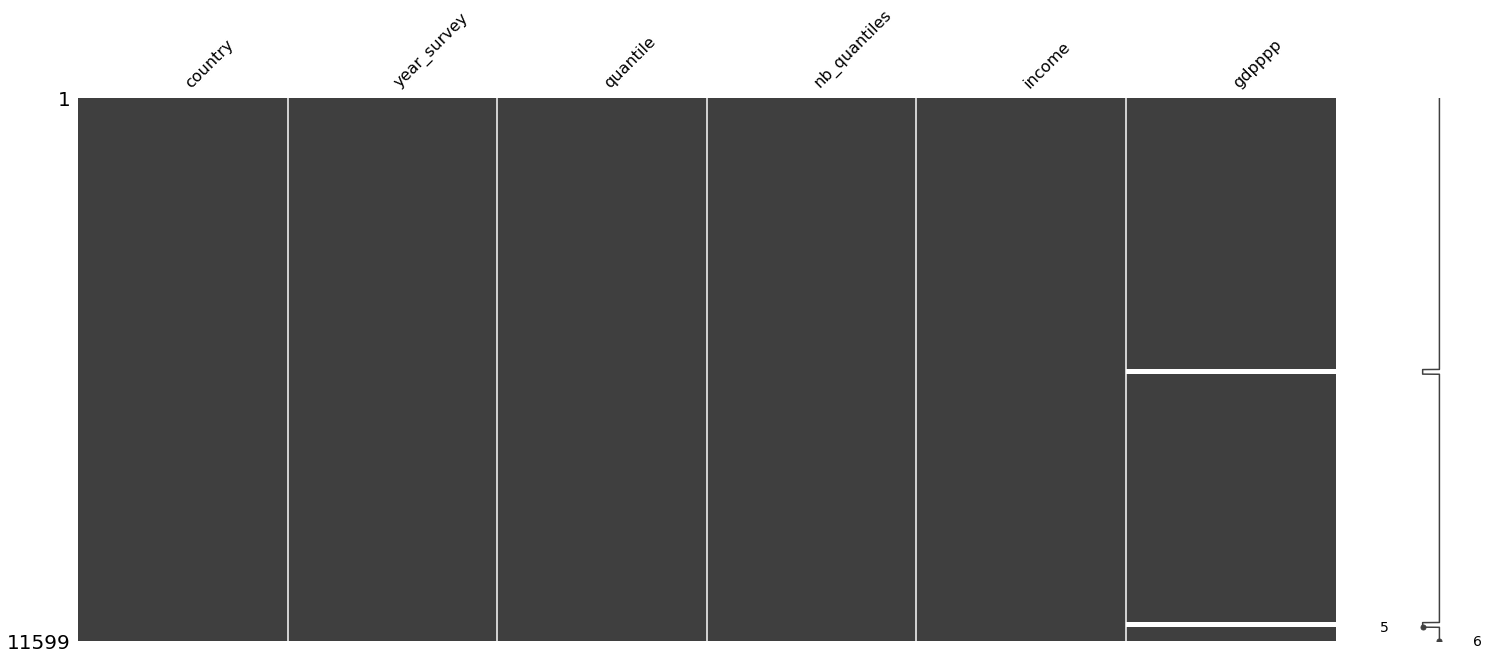

In [6]:
plt.figure(figsize = (8,8))
msno.matrix(world_income_distribution)

## Nombre de valeurs manquantes par colonne

In [7]:
world_income_distribution.isnull().sum()

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
dtype: int64

## Recherche des valeurs aberrantes 

In [8]:
world_income_distribution.groupby(by=["year_survey"]).nunique()

,country,quantile,nb_quantiles,income,gdpppp
year_survey,,,,,
2004,1,100,1,100,1
2006,5,100,1,500,5
2007,15,100,1,1500,15
2008,76,100,1,7598,75
2009,12,100,1,1200,11
2010,6,100,1,600,6
2011,1,100,1,100,1


## Visualisation des valeurs nulles 

In [9]:
valeurs_nulles = world_income_distribution[world_income_distribution.isnull().any(axis=1)]
valeurs_nulles

,country,year_survey,quantile,nb_quantiles,income,gdpppp
5800,XKX,2008,1,100,437.89370,NaN
5801,XKX,2008,2,100,508.17133,NaN
5802,XKX,2008,3,100,591.82820,NaN
5803,XKX,2008,4,100,668.00000,NaN
5804,XKX,2008,5,100,730.40220,NaN
...,...,...,...,...,...,...
11294,PSE,2009,96,100,2763.88480,NaN
11295,PSE,2009,97,100,3077.83330,NaN
11296,PSE,2009,98,100,3449.22240,NaN
11297,PSE,2009,99,100,4165.99700,NaN


In [10]:
valeurs_nulles.country.unique()

array(['XKX', 'PSE'], dtype=object)

## Remplacer les valeurs manquantes 

In [11]:
world_income_distribution.loc[(world_income_distribution["country"] =='XKX'),'gdpppp']=7249

In [12]:
world_income_distribution.loc[(world_income_distribution['country']== 'PSE'),'gdpppp'] = 3613

## Vérification du nombre de quantiles

In [13]:
world_income_distribution[world_income_distribution["nb_quantiles"] < 100]

,country,year_survey,quantile,nb_quantiles,income,gdpppp


## Vérication qu'il ne reste plus des valeurs nulles

In [14]:
world_income_distribution.isna().sum()

country         0
year_survey     0
quantile        0
nb_quantiles    0
income          0
gdpppp          0
dtype: int64

## Recherche des doublons

In [15]:
world_income_distribution.drop_duplicates()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.00000
1,ALB,2008,2,100,916.66235,7297.00000
2,ALB,2008,3,100,1010.91600,7297.00000
3,ALB,2008,4,100,1086.90780,7297.00000
4,ALB,2008,5,100,1132.69970,7297.00000
...,...,...,...,...,...,...
11594,COD,2008,96,100,810.62330,303.19305
11595,COD,2008,97,100,911.78340,303.19305
11596,COD,2008,98,100,1057.80740,303.19305
11597,COD,2008,99,100,1286.60290,303.19305


# Mission 1

## Résumez les données utilisées 

### Années des données utilisées

In [16]:
year_survey_unique = world_income_distribution.year_survey.unique()
year_survey_unique

array([2008, 2009, 2010, 2007, 2006, 2011, 2004], dtype=int64)

### Nombre de pays présents 

In [17]:
world_income_distribution.country.unique().shape

(116,)

### Population couverte par l'analyse (en termes de pourcentage de la population mondiale).

#### Tableau croisé dynamique

In [18]:
world_income_pivot = world_income_distribution.pivot_table(values = "income",  
                                                           index = ["country", "quantile",
                                                                    "nb_quantiles","gdpppp"],
                                                            columns = "year_survey", aggfunc = np.sum)
                                                                                      
world_income_pivot = world_income_pivot.reset_index()
#world_income_pivot

In [19]:
world_income_pivot = world_income_pivot.fillna(0)
world_income_pivot

year_survey,country,quantile,nb_quantiles,gdpppp,2004,2006,2007,2008,2009,2010,2011
0,ALB,1,100,7297.0,0.0,0.0,0.0,728.89795,0.0,0.0,0.0
1,ALB,2,100,7297.0,0.0,0.0,0.0,916.66235,0.0,0.0,0.0
2,ALB,3,100,7297.0,0.0,0.0,0.0,1010.91600,0.0,0.0,0.0
3,ALB,4,100,7297.0,0.0,0.0,0.0,1086.90780,0.0,0.0,0.0
4,ALB,5,100,7297.0,0.0,0.0,0.0,1132.69970,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11594,ZAF,96,100,9602.0,0.0,0.0,0.0,24553.56800,0.0,0.0,0.0
11595,ZAF,97,100,9602.0,0.0,0.0,0.0,28858.03100,0.0,0.0,0.0
11596,ZAF,98,100,9602.0,0.0,0.0,0.0,35750.29000,0.0,0.0,0.0
11597,ZAF,99,100,9602.0,0.0,0.0,0.0,46297.31600,0.0,0.0,0.0


In [20]:
world_income_rename = world_income_pivot.rename(columns = {2004: "income_2004", 2006: "income_2006",
                                                          2007: "income_2007", 2008: "income_2008",
                                                          2009: "income_2009", 2010: "income_2010",
                                                          2011: "income_2011"})
world_income_rename

year_survey,country,quantile,nb_quantiles,gdpppp,income_2004,income_2006,income_2007,income_2008,income_2009,income_2010,income_2011
0,ALB,1,100,7297.0,0.0,0.0,0.0,728.89795,0.0,0.0,0.0
1,ALB,2,100,7297.0,0.0,0.0,0.0,916.66235,0.0,0.0,0.0
2,ALB,3,100,7297.0,0.0,0.0,0.0,1010.91600,0.0,0.0,0.0
3,ALB,4,100,7297.0,0.0,0.0,0.0,1086.90780,0.0,0.0,0.0
4,ALB,5,100,7297.0,0.0,0.0,0.0,1132.69970,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11594,ZAF,96,100,9602.0,0.0,0.0,0.0,24553.56800,0.0,0.0,0.0
11595,ZAF,97,100,9602.0,0.0,0.0,0.0,28858.03100,0.0,0.0,0.0
11596,ZAF,98,100,9602.0,0.0,0.0,0.0,35750.29000,0.0,0.0,0.0
11597,ZAF,99,100,9602.0,0.0,0.0,0.0,46297.31600,0.0,0.0,0.0


In [21]:
world_income_2008 = world_income_distribution[world_income_distribution["year_survey"]==2008]
world_income_2008

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.00000
1,ALB,2008,2,100,916.66235,7297.00000
2,ALB,2008,3,100,1010.91600,7297.00000
3,ALB,2008,4,100,1086.90780,7297.00000
4,ALB,2008,5,100,1132.69970,7297.00000
...,...,...,...,...,...,...
11594,COD,2008,96,100,810.62330,303.19305
11595,COD,2008,97,100,911.78340,303.19305
11596,COD,2008,98,100,1057.80740,303.19305
11597,COD,2008,99,100,1286.60290,303.19305


#### Dataframe de la world bank 

In [22]:
pays_iso3 = pd.read_excel(r"C:\Users\Utilisateur\projet 7\data_population.xlsx")
pays_iso3

,Country Name,country,Indicator Name,2004,2006,2007,2008,2009,2010,2011
0,Aruba,ABW,"Population, total",98744,100830,101226,101362,101452,101665,102050
1,Africa Eastern and Southern,AFE,"Population, total",441630149,465581372,478166911,491173160,504604672,518468229,532760424
2,Afghanistan,AFG,"Population, total",24726689,26433058,27100542,27722281,28394806,29185511,30117411
3,Africa Western and Central,AFW,"Population, total",297353098,313985474,322741656,331772330,341050537,350556886,360285439
4,Angola,AGO,"Population, total",18758138,20149905,20905360,21695636,22514275,23356247,24220660
...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,"Population, total",1704622,1719536,1733404,1747383,1761474,1775680,1791000
259,Yemen,YEM,"Population, total",18985001,20107416,20687648,21282514,21892149,22516464,23154854
260,South Africa,ZAF,"Population, total",47291610,48489464,49119766,49779472,50477013,51216967,52003759
261,Zambia,ZMB,"Population, total",11550641,12173518,12502958,12848531,13215142,13605986,14023199


##### On vérifie qu'il n'y a pas Nan 

In [23]:
pays_iso3.isnull().sum()

Country Name      0
country           0
Indicator Name    0
2004              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
dtype: int64

## Restriction sur les colonnes qui nous interèsse 

In [24]:
population_2008= pays_iso3[["Country Name", "country", 2008]]
population_2008

,Country Name,country,2008
0,Aruba,ABW,101362
1,Africa Eastern and Southern,AFE,491173160
2,Afghanistan,AFG,27722281
3,Africa Western and Central,AFW,331772330
4,Angola,AGO,21695636
...,...,...,...
258,Kosovo,XKX,1747383
259,Yemen,YEM,21282514
260,South Africa,ZAF,49779472
261,Zambia,ZMB,12848531


#### Calcul de la population mondiale pour chaque année

In [25]:
world_income_distribution.year_survey.min()

2004

In [26]:
#world_income_distribution.year_survey.max()

In [27]:
population_mondiale = []

#Amélioration1
# utiliser year_survey_unique.min() dans le début du range()
# Mais le problème en python est de créer une liste dont le premier élément n'est pas index 0
#Amélioration2
# La série pays_iso3.loc retourne une autre série mais il faudrait extraire seulement la population
# Je m'en suis sorti en regardant le describe où voit qu'on peut utiliser mean/min/max...
# mais ça fait pas propre
for annee_survey in range(0, year_survey_unique.max() + 1):
    if annee_survey in year_survey_unique:
        population_mondiale.insert(annee_survey, pays_iso3.loc[(pays_iso3["country"] =='WLD'), annee_survey].min())
        print("Année : ", annee_survey, "| Population mondiale : ", population_mondiale[annee_survey])
    else:
        population_mondiale.insert(annee_survey, 0)
        
#population_mondiale[2006]

Année :  2004 | Population mondiale :  6431551721
Année :  2006 | Population mondiale :  6592734559
Année :  2007 | Population mondiale :  6674203697
Année :  2008 | Population mondiale :  6757020825
Année :  2009 | Population mondiale :  6839574233
Année :  2010 | Population mondiale :  6921877071
Année :  2011 | Population mondiale :  7002880914


#### Jointure entre les dataframes pays_iso3 et world_income_distribution

In [28]:
world_income_population  = pd.merge(world_income_pivot, pays_iso3,
                                   left_on =["country"], 
                                   right_on = ["country"])
#world_income_population

In [29]:
world_income_pop = world_income_population.groupby(by = ["country", "2004_y","2006_y","2007_y","2008_y", "2009_y",
                                                        "2010_y", "2011_y"]).agg({"2008_x":"sum"})
                                                    
world_income_pop = world_income_pop.reset_index()
#world_income_pop

#### Calcul du pourcentage de la population totale pour chaque année 

In [30]:
# Calcul de la population totale en 2008

population_totale_2004 = world_income_pop["2004_y"].sum()
pourcent_population_totale_2004 =(100 * population_totale_2004 /population_mondiale[2004])

population_totale_2006 = world_income_pop["2006_y"].sum()
pourcent_population_totale_2006 =(100 * population_totale_2006 / population_mondiale[2006])

population_totale_2007 = world_income_pop["2007_y"].sum()
pourcent_population_totale_2007 =(100 * population_totale_2007 / population_mondiale[2007])

population_totale_2008 = world_income_pop["2008_y"].sum()
pourcent_population_totale_2008 =(100 * population_totale_2008 / population_mondiale[2008])

population_totale_2009 = world_income_pop["2009_y"].sum()
pourcent_population_totale_2009 =(100 * population_totale_2009 / population_mondiale[2009])

population_totale_2010 = world_income_pop["2010_y"].sum()
pourcent_population_totale_2010 =(100 * population_totale_2010 / population_mondiale[2010])

population_totale_2011 = world_income_pop["2011_y"].sum()
pourcent_population_totale_2011 =(100 * population_totale_2011 / population_mondiale[2011])

print("Le pourcentage de la Population couverte par l'analyse en 2004 est:",pourcent_population_totale_2004)
print("\n Le pourcentage de la Population couverte par l'analyse en 2006 est:",pourcent_population_totale_2006)
print("\n Le pourcentage de la Population couverte par l'analyse en 2007 est:",pourcent_population_totale_2007)
print("\n Le pourcentage de la Population couverte par l'analyse en 2008 est:",pourcent_population_totale_2008)
print("\n Le pourcentage de la Population couverte par l'analyse en 2009 est:",pourcent_population_totale_2009)
print("\n Le pourcentage de la Population couverte par l'analyse en 2010 est:",pourcent_population_totale_2010)
print("\n Le pourcentage de la Population couverte par l'analyse en 2011 est:",pourcent_population_totale_2011)

Le pourcentage de la Population couverte par l'analyse en 2004 est: 91.68112739802687

 Le pourcentage de la Population couverte par l'analyse en 2006 est: 91.54347570024774

 Le pourcentage de la Population couverte par l'analyse en 2007 est: 91.47243139648513

 Le pourcentage de la Population couverte par l'analyse en 2008 est: 91.39132447471775

 Le pourcentage de la Population couverte par l'analyse en 2009 est: 91.31088205560236

 Le pourcentage de la Population couverte par l'analyse en 2010 est: 91.22222400415698

 Le pourcentage de la Population couverte par l'analyse en 2011 est: 91.12801800244921


#### Conclusions Mission 1

Les données de la World Income Distribution présentent pour chaque pays les quantiles de la distribution des revenus de leur population respective.

#### De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ?

#### Définition d'un quantile

#### Réponse à la question

#### Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ?

#### Réponse à la question

#### Pourquoi?

In [31]:
world_income_distribution

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.00000
1,ALB,2008,2,100,916.66235,7297.00000
2,ALB,2008,3,100,1010.91600,7297.00000
3,ALB,2008,4,100,1086.90780,7297.00000
4,ALB,2008,5,100,1132.69970,7297.00000
...,...,...,...,...,...,...
11594,COD,2008,96,100,810.62330,303.19305
11595,COD,2008,97,100,911.78340,303.19305
11596,COD,2008,98,100,1057.80740,303.19305
11597,COD,2008,99,100,1286.60290,303.19305


##### Les 20 quantiles ayant les plus faibles revenus

In [32]:
quantiles_faibles_revenus = world_income_distribution.sort_values(by = ["income"]).head(20)
quantiles_faibles_revenus

,country,year_survey,quantile,nb_quantiles,income,gdpppp
1700,CHN,2007,1,100,16.719418,5712.00000
5700,KOR,2008,1,100,17.317732,19162.00000
1100,BOL,2008,1,100,20.584948,3950.00000
11499,COD,2008,1,100,29.364283,303.19305
6699,MDG,2010,1,100,29.411367,950.00000
1800,CIV,2008,1,100,34.555264,1526.00000
9799,SWZ,2009,1,100,35.930096,4748.00000
6000,LBR,2007,1,100,37.782673,372.00000
3900,GTM,2011,1,100,38.463615,4367.00000
1400,CAF,2008,1,100,40.928130,685.00000


In [33]:
quantiles_faibles_revenus.head(20)

,country,year_survey,quantile,nb_quantiles,income,gdpppp
1700,CHN,2007,1,100,16.719418,5712.00000
5700,KOR,2008,1,100,17.317732,19162.00000
1100,BOL,2008,1,100,20.584948,3950.00000
11499,COD,2008,1,100,29.364283,303.19305
6699,MDG,2010,1,100,29.411367,950.00000
1800,CIV,2008,1,100,34.555264,1526.00000
9799,SWZ,2009,1,100,35.930096,4748.00000
6000,LBR,2007,1,100,37.782673,372.00000
3900,GTM,2011,1,100,38.463615,4367.00000
1400,CAF,2008,1,100,40.928130,685.00000


##### Les 20 quantiles ayant les plus haut revenus

In [34]:
quantiles_hauts_revenus = world_income_distribution.sort_values(by = ["income"], ascending = False)
quantiles_hauts_revenus.head(20)

,country,year_survey,quantile,nb_quantiles,income,gdpppp
10998,USA,2008,100,100,176928.550,43261.0
4899,ISL,2008,100,100,160645.270,36527.0
3499,GBR,2008,100,100,141565.230,34048.0
1599,CAN,2008,100,100,133454.840,35895.0
3399,FRA,2008,100,100,122775.164,30357.0
8198,NOR,2008,100,100,120354.220,49070.0
6398,LUX,2008,100,100,114823.680,73127.0
10997,USA,2008,99,100,106765.260,43261.0
2499,DEU,2008,100,100,103661.980,33758.0
2299,CYP,2008,100,100,98480.560,26273.0


#### Explication de l'unité  $PPP méthode de Eltöte-Köves-Szulc

# Nous allons continuer avec l'année 2008

In [35]:
world_income2 = world_income_2008.drop(columns =["year_survey"] )
world_income2

,country,quantile,nb_quantiles,income,gdpppp
0,ALB,1,100,728.89795,7297.00000
1,ALB,2,100,916.66235,7297.00000
2,ALB,3,100,1010.91600,7297.00000
3,ALB,4,100,1086.90780,7297.00000
4,ALB,5,100,1132.69970,7297.00000
...,...,...,...,...,...
11594,COD,96,100,810.62330,303.19305
11595,COD,97,100,911.78340,303.19305
11596,COD,98,100,1057.80740,303.19305
11597,COD,99,100,1286.60290,303.19305


In [36]:
# Pour l'année 2008 les 5 quantiles ayant le revenus le plus faible 
quantiles_faibles_revenus_2008 = world_income2.sort_values(by = ["income"]).head()
quantiles_faibles_revenus_2008

,country,quantile,nb_quantiles,income,gdpppp
5700,KOR,1,100,17.317732,19162.00000
1100,BOL,1,100,20.584948,3950.00000
11499,COD,1,100,29.364283,303.19305
1800,CIV,1,100,34.555264,1526.00000
1400,CAF,1,100,40.928130,685.00000


In [37]:
quantiles_hauts_revenus_2008 = world_income2.sort_values(by = ["income"], ascending = False)
quantiles_hauts_revenus_2008.head(5)

,country,quantile,nb_quantiles,income,gdpppp
10998,USA,100,100,176928.550,43261.0
4899,ISL,100,100,160645.270,36527.0
3499,GBR,100,100,141565.230,34048.0
1599,CAN,100,100,133454.840,35895.0
3399,FRA,100,100,122775.164,30357.0


## Ajout du nom des pays selon iso3

In [38]:
missing_values = ["n/a", "na", "..", "--"]
pays_iso3 = pd.read_excel(r"C:\Users\Utilisateur\projet 7\country_code_iso3.xlsx", na_values = missing_values, index_col = 0, )
pays_iso3= pays_iso3.reset_index()
pays_iso3.head(2)

,Pays,ISO2,ISO3
0,Afghanistan,AF,AFG
1,Aland Islands,AX,ALA


In [39]:
#Nous allons récupérer uniquement le Pays et le code iso3

In [40]:
iso3 = pays_iso3[["Pays", "ISO3"]]
iso3.head(2)

,Pays,ISO3
0,Afghanistan,AFG
1,Aland Islands,ALA


## Jointure entre iso3 et world_income2

In [41]:
income_iso3 = pd.merge(world_income2, iso3, left_on = "country", right_on = "ISO3")
income_iso3.head(2)

,country,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
0,ALB,1,100,728.89795,7297.0,Albania,ALB
1,ALB,2,100,916.66235,7297.0,Albania,ALB


In [42]:
income_iso3.isnull().sum()

country         0
quantile        0
nb_quantiles    0
income          0
gdpppp          0
Pays            0
ISO3            0
dtype: int64

## Ajout de la population 

In [43]:
pop_income_2008 = pd.merge(income_iso3, population_2008, left_on = "country", right_on ="country" )
pop_income_2008.head()

,country,quantile,nb_quantiles,income,gdpppp,Pays,ISO3,Country Name,2008
0,ALB,1,100,728.89795,7297.0,Albania,ALB,Albania,2947314
1,ALB,2,100,916.66235,7297.0,Albania,ALB,Albania,2947314
2,ALB,3,100,1010.91600,7297.0,Albania,ALB,Albania,2947314
3,ALB,4,100,1086.90780,7297.0,Albania,ALB,Albania,2947314
4,ALB,5,100,1132.69970,7297.0,Albania,ALB,Albania,2947314


In [44]:
# Nous allons faire une restriction pour ne garder que les colonnes utiles 
pop_income = pop_income_2008[["Pays","ISO3", 2008,  "quantile", "nb_quantiles","income", "gdpppp"]]

# On va renommer la colonne 2008 en population 
pop_income = pop_income.rename(columns = {2008: "population"})
pop_income.head()

,Pays,ISO3,population,quantile,nb_quantiles,income,gdpppp
0,Albania,ALB,2947314,1,100,728.89795,7297.0
1,Albania,ALB,2947314,2,100,916.66235,7297.0
2,Albania,ALB,2947314,3,100,1010.91600,7297.0
3,Albania,ALB,2947314,4,100,1086.90780,7297.0
4,Albania,ALB,2947314,5,100,1132.69970,7297.0


# Mission 2

## Graphique de la distribution de revenus par pays.

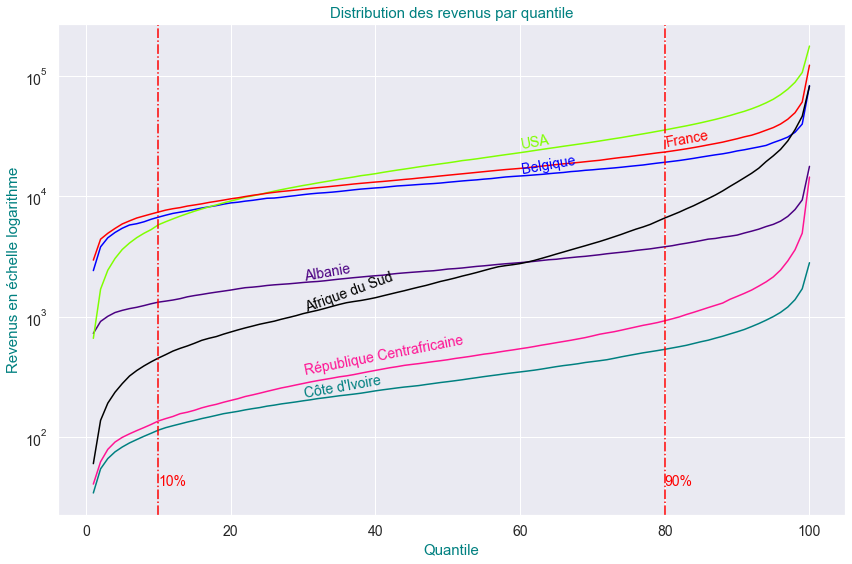

In [45]:
sn.set(style = "darkgrid")
# Pametres requis 
plt.figure(figsize = (12,8))
plt.yscale('log')

income_alb = pop_income[pop_income["Pays"] == "Albania"]
income_bel = pop_income[pop_income["Pays"] == "Belgium"]
income_caf = pop_income[pop_income["Pays"] == "Central African Republic"]
income_civ = pop_income[pop_income["Pays"] == "Cote d'Ivoire"]
income_usa = pop_income[pop_income["Pays"] == "United States of America"]
income_zaf = pop_income[pop_income["Pays"] == "South Africa"]
income_fra = pop_income[pop_income["Pays"] == "France"]
    
liste_pays_francais = ["Albanie", "Belgique", "République Centrafricaine", "Côte d'Ivoire",
                       "Etats-Unis", "Afrique du Sud", "France"]
    
# Caractéristiques du tracé des courbes
plt.plot(income_alb["quantile"],income_alb["income"], color = 'indigo')
plt.text(30, 2000, 'Albanie', fontsize = 14, color = 'indigo', rotation = 10 )

plt.plot(income_bel["quantile"], income_bel["income"], color = 'blue')
plt.text(60, 15500, "Belgique", fontsize = 14, color = 'blue', rotation = 10)

plt.plot(income_caf["quantile"], income_caf["income"], color = 'deeppink')
plt.text(30, 330, "République Centrafricaine", fontsize = 14, color = 'deeppink', rotation = 11)

plt.plot(income_civ["quantile"], income_civ["income"], color = 'teal' )
plt.text(30, 215, "Côte d'Ivoire", fontsize = 14, color = 'teal', rotation = 10)

plt.plot(income_usa["quantile"], income_usa["income"], color = 'chartreuse' )
plt.text(60, 25000, "USA", fontsize = 14, color = 'chartreuse', rotation = 10)

plt.plot(income_zaf["quantile"], income_zaf["income"], color = "black" )
plt.text(30, 1100, "Afrique du Sud", fontsize = 14, color = "black", rotation = 20)

plt.plot(income_fra["quantile"], income_fra["income"], color = "red" )
plt.text(80, 26000, "France", fontsize = 14, color = "red" , rotation = 10)
   
# Ajout de lignes de référence
plt.axvline(10, linestyle = "dashdot", color = "red")
plt.text(10, 40, "10%", color = "red", fontsize = 14)

plt.axvline(80, linestyle = "dashdot", color = "red")
plt.text(80, 40, "90%", color = "red", fontsize = 14)

# Métadonnées 
plt.title( "Distribution des revenus par quantile", fontsize = 15, color = "teal")
plt.ylabel("Revenus en échelle logarithme", fontsize = 15, color = "teal")
plt.xlabel("Quantile", fontsize = 15, color = "teal")
plt.yticks (fontsize = 14)
plt.xticks(fontsize = 14)
plt.tight_layout()


#Sauvegarder la figure
plt.savefig("Distribution des revnus par quantile.png")
plt.show()





## Courbe de Lorenz de chacun des pays

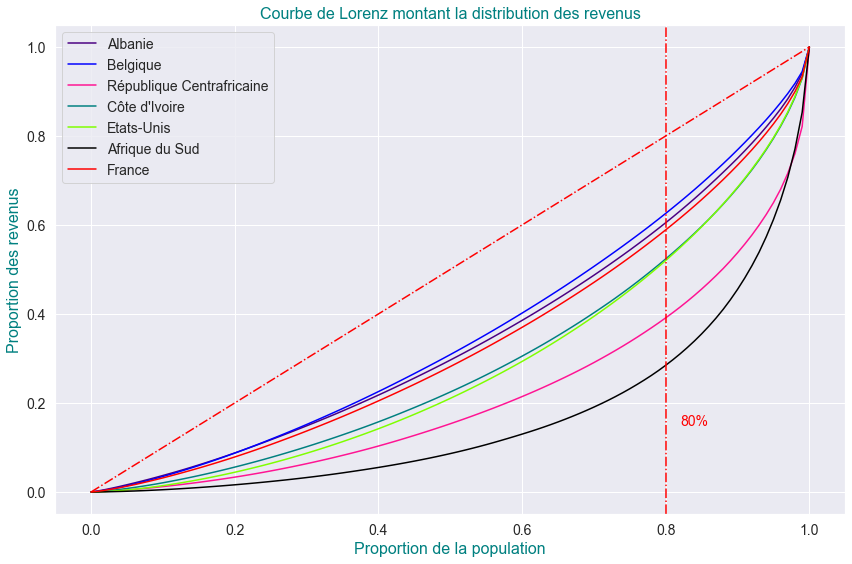

In [46]:
# Paramètres de la figure
sn.set(style = "darkgrid")
plt.figure(figsize = (12,8))

# Les données de la courbe de Lorenz pour Albanie
income_albanie = income_alb["income"].values
lorenz_albanie =  np.cumsum(np.sort(income_albanie)) / income_albanie.sum() # on tri par ordre croissant 
lorenz_albanie = np.append([0],lorenz_albanie) # La courbe de Lorenz commence à 0

plt.plot(np.linspace(0,1,len(lorenz_albanie)),lorenz_albanie,color="indigo")  
             

# Les données de la courbe de Lorenz pour Belgique
income_belgique = income_bel["income"].values
income_belgique =  np.cumsum(np.sort(income_belgique)) / income_belgique.sum() 
income_belgique = np.append([0],income_belgique) 

plt.plot(np.linspace(0,1,len(income_belgique)),income_belgique, color="blue") 


# Les données de la courbe de Lorenz pour la République Centrafricaine
income_centreafrique = income_caf["income"].values
income_centreafrique =  np.cumsum(np.sort(income_centreafrique)) / income_centreafrique.sum() 
income_centreafrique = np.append([0],income_centreafrique) 

plt.plot(np.linspace(0,1,len(income_centreafrique)),income_centreafrique, color="deeppink")


# Les données de la courbe de Lorenz pour la Côte d'Ivoire
income_coteivoire = income_civ["income"].values
income_coteivoire =  np.cumsum(np.sort(income_coteivoire)) / income_coteivoire.sum() 
income_coteivoire = np.append([0],income_coteivoire) 

plt.plot(np.linspace(0,1,len(income_coteivoire)),income_coteivoire, color="teal")


# Les données de la courbe de Lorenz pour les USA
income_USA = income_usa["income"].values
income_USA =  np.cumsum(np.sort(income_USA)) / income_USA.sum() 
income_USA = np.append([0],income_USA) 

plt.plot(np.linspace(0,1,len(income_USA)),income_USA, color="chartreuse")


# Les données de la courbe de Lorenz pour l'Afrique du Sud
income_afriquesud = income_zaf["income"].values
income_afriquesud =  np.cumsum(np.sort(income_afriquesud)) / income_afriquesud.sum() 
income_afriquesud = np.append([0],income_afriquesud) 

plt.plot(np.linspace(0,1,len(income_afriquesud)),income_afriquesud, color="black")


# Les données de la courbe de Lorenz pour la France
income_france = income_fra["income"].values
income_france =  np.cumsum(np.sort(income_france)) / income_france.sum() 
income_france = np.append([0],income_france) 

plt.plot(np.linspace(0,1,len(income_france)),income_france, color="red")

# Tracer de la médiatrice 
x = [0,1]
y = [0,1]
plt.plot(x, y , color = "red", linestyle = "dashdot")

# lignes de référence
plt.axvline(0.8, linestyle = "dashdot", color = "red")
plt.text(0.82, 0.15, "80%", color = "red", fontsize = 14)

# Métadonnées 
plt.title("Courbe de Lorenz montant la distribution des revenus", fontsize = 16, color = "teal")
plt.ylabel("Proportion des revenus", fontsize = 16, color = "teal")
plt.xlabel("Proportion de la population", fontsize = 16, color = "teal")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.legend(liste_pays_francais, fontsize = 14)

# Sauvengarde
plt.savefig("Courbe de Lorenz.png")

plt.show()


## Évolution de l'indice de Gini au fil des ans pour chaque pays

http://hdr.undp.org/en/indicators/137506#

In [47]:
gini = pd.read_csv(r"C:\Users\Utilisateur\projet 7\indice de gini.csv", header = 2)
gini= gini.drop(columns =["Country Code","Indicator Name","Indicator Code" , "Unnamed: 65", "1960", "1961","1962", "1963", "1964", "1965", "1966", "1967",
                                 "1968", "1969", "1970", "1971","1972", "1973", "1974", "1975",
                                 "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983",
                                   "1984", "1985", "1986", "1987", "1988", "1989", "1990"])
gini.set_index("Country Name", inplace = True)
gini = gini.apply(lambda x : x/100)
gini.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.513,NaN,NaN


In [48]:
liste_pays = ["Albania", "Belgium", "Central African Republic", "Cote d'Ivoire", "United States", "South Africa", "France"]

In [49]:
# Recherche des pays

for pays in liste_pays:
    if pays in liste_pays:
        print(pays)
   

Albania
Belgium
Central African Republic
Cote d'Ivoire
United States
South Africa
France


In [50]:
#### Nous allons restreindre le tableau pour récuprer uniquement les pays qui nous interèsse
gini_pays = gini.loc[(gini.index == 'France') |
                    (gini.index == "South Africa") |
                    (gini.index== "United States") |
                    (gini.index == "Cote d'Ivoire") |
                     (gini.index == "Central African Republic" )|
                    (gini.index =="Belgium") |
                    (gini.index =="Albania")].T

#gini_pays.rename(columns = {"Country Code": "year"})
gini_pays.head(2)

Country Name,Albania,Belgium,Central African Republic,Cote d'Ivoire,France,United States,South Africa
1991,NaN,NaN,NaN,NaN,NaN,0.380,NaN
1992,NaN,0.25,0.613,0.394,NaN,0.384,NaN


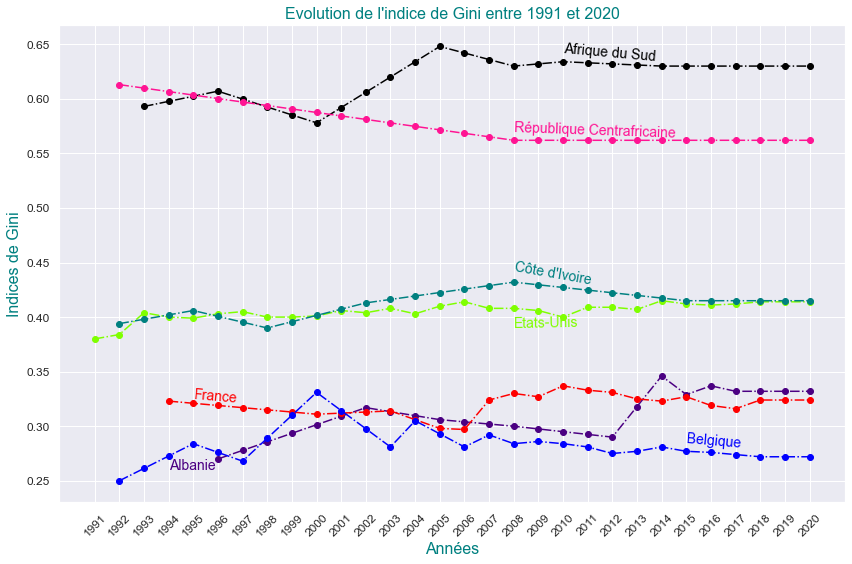

In [138]:
# Paramètres des courbes
sn.set(style = "darkgrid")
plt.figure(figsize = (12,8))

liste_pays_francais = ["Albanie", "Belgique", "République Centrafricaine", "Côte d'Ivoire", "Etats-Unis", "Afrique du Sud", "France"]



plt.plot(gini_pays["Albania"].interpolate(method = "linear"), color = 'indigo',
                  linestyle = "dashdot", marker = "o")
plt.text(3, 0.26, "Albanie", fontsize = 14, color = "indigo")



plt.plot(gini_pays["France"].interpolate(method = "linear"), color = 'red',
                  linestyle = "dashdot", marker = "o")
plt.text(4, 0.322, "France", fontsize = 14, color = "red", rotation = -5)



plt.plot(gini_pays["South Africa"].interpolate(method = "linear"), color = 'black',
                  linestyle = "dashdot", marker = "o")
plt.text(19, 0.635, "Afrique du Sud", fontsize = 14, color = "black", rotation = -5)



plt.plot(gini_pays["Belgium"].interpolate(method = "linear"), color = 'blue',
                  linestyle = "dashdot", marker = "o")
plt.text(24, 0.281, "Belgique", fontsize = 14, color = "blue", rotation = -5)


plt.plot(gini_pays["United States"].interpolate(method = "linear"), color = 'chartreuse',
                  linestyle = "dashdot", marker = "o")
plt.text(17, 0.39, "Etats-Unis", fontsize = 14, color = "chartreuse", rotation = 1)

plt.plot(gini_pays["Cote d'Ivoire"].interpolate(method = "linear"), color = 'teal',
                  linestyle = "dashdot", marker = "o")
plt.text(17, 0.43, "Côte d'Ivoire", fontsize = 14, color = "teal", rotation = -10)


plt.plot(gini_pays["Central African Republic"].interpolate(method = "linear"), color = 'deeppink',
                   linestyle = "dashdot", marker = "o")
plt.text(17, 0.565, "République Centrafricaine", fontsize = 14, color = "deeppink", rotation = -2)

# Métadonnées 
plt.title("Evolution de l'indice de Gini entre 1991 et 2020", fontsize = 16, color = "teal")
plt.ylabel("Indices de Gini", fontsize = 16, color = "teal")
plt.xlabel("Années", fontsize = 16, color = "teal")
plt.xticks(fontsize = 12, rotation =45)
plt.yticks(fontsize = 12)
plt.tight_layout()

# Sauvengarde
plt.savefig("Evolution de l'indice de Gini.png")

plt.show()


## Classez les pays par indice de Gini

### Calcul de l'indice de Gini à partir du fichier de la World Income Distribution pour l'année 2008

In [52]:
pop_income

,Pays,ISO3,population,quantile,nb_quantiles,income,gdpppp
0,Albania,ALB,2947314,1,100,728.89795,7297.00000
1,Albania,ALB,2947314,2,100,916.66235,7297.00000
2,Albania,ALB,2947314,3,100,1010.91600,7297.00000
3,Albania,ALB,2947314,4,100,1086.90780,7297.00000
4,Albania,ALB,2947314,5,100,1132.69970,7297.00000
...,...,...,...,...,...,...,...
7394,Congo Democratic Republic of the,COD,58453687,96,100,810.62330,303.19305
7395,Congo Democratic Republic of the,COD,58453687,97,100,911.78340,303.19305
7396,Congo Democratic Republic of the,COD,58453687,98,100,1057.80740,303.19305
7397,Congo Democratic Republic of the,COD,58453687,99,100,1286.60290,303.19305


In [53]:
# La liste des pays
pop_income_pays = pop_income["Pays"].drop_duplicates().values

# On crée la colonne gini
pop_income["gini"] = 0

# Calcul de l'indice de gini pour chaque pays

for pays in pop_income_pays:
    income_pays = pop_income.loc[pop_income['Pays'] == pays].income.values
    lorenz = np.cumsum(np.sort(income_pays)) / income_pays.sum()
    lorenz = np.append([0], lorenz)
    pop_income.loc[pop_income['Pays'] == pays, 'gini'] = 2 * (0.5 - (lorenz[:-1].sum() / len(lorenz)))

pop_income.head()

,Pays,ISO3,population,quantile,nb_quantiles,income,gdpppp,gini
0,Albania,ALB,2947314,1,100,728.89795,7297.0,0.32141
1,Albania,ALB,2947314,2,100,916.66235,7297.0,0.32141
2,Albania,ALB,2947314,3,100,1010.91600,7297.0,0.32141
3,Albania,ALB,2947314,4,100,1086.90780,7297.0,0.32141
4,Albania,ALB,2947314,5,100,1132.69970,7297.0,0.32141


### Ajout du rang pour chaque pays
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html

In [54]:
pop_income_group = pop_income.groupby(["Pays", "ISO3"]).mean()
pop_income_group = pop_income_group.reset_index()
pop_income_group

,Pays,ISO3,population,quantile,nb_quantiles,income,gdpppp,gini
0,Albania,ALB,2947314.0,50.5,100.0,2994.829902,7297.0,0.321410
1,Argentina,ARG,40080159.0,50.5,100.0,5847.884654,13220.0,0.465249
2,Armenia,ARM,2907615.0,50.5,100.0,1628.382785,5611.0,0.280305
3,Austria,AUT,8321496.0,50.5,100.0,16637.600204,36193.0,0.295326
4,Azerbaijan,AZE,8763400.0,50.5,100.0,2357.429023,8101.0,0.329031
...,...,...,...,...,...,...,...,...
69,Ukraine,UKR,46258189.0,50.5,100.0,3349.388306,6721.0,0.272415
70,United Kingdom,GBR,61806995.0,50.5,100.0,21709.604470,34048.0,0.355824
71,United States of America,USA,304093966.0,50.5,100.0,25503.581661,43261.0,0.447326
72,Uruguay,URY,3340221.0,50.5,100.0,5290.784920,11682.0,0.475060


In [55]:
pop_income_group["rank"] = pop_income_group["gini"].rank(method = "first")
pop_income_group

,Pays,ISO3,population,quantile,nb_quantiles,income,gdpppp,gini,rank
0,Albania,ALB,2947314.0,50.5,100.0,2994.829902,7297.0,0.321410,25.0
1,Argentina,ARG,40080159.0,50.5,100.0,5847.884654,13220.0,0.465249,59.0
2,Armenia,ARM,2907615.0,50.5,100.0,1628.382785,5611.0,0.280305,8.0
3,Austria,AUT,8321496.0,50.5,100.0,16637.600204,36193.0,0.295326,14.0
4,Azerbaijan,AZE,8763400.0,50.5,100.0,2357.429023,8101.0,0.329031,29.0
...,...,...,...,...,...,...,...,...,...
69,Ukraine,UKR,46258189.0,50.5,100.0,3349.388306,6721.0,0.272415,5.0
70,United Kingdom,GBR,61806995.0,50.5,100.0,21709.604470,34048.0,0.355824,38.0
71,United States of America,USA,304093966.0,50.5,100.0,25503.581661,43261.0,0.447326,56.0
72,Uruguay,URY,3340221.0,50.5,100.0,5290.784920,11682.0,0.475060,61.0


In [56]:
pop_income_rank = pd.merge(pop_income, pop_income_group, left_on = "ISO3", right_on = 'ISO3')
pop_income_rank.head()

,Pays_x,ISO3,population_x,quantile_x,nb_quantiles_x,income_x,gdpppp_x,gini_x,Pays_y,population_y,quantile_y,nb_quantiles_y,income_y,gdpppp_y,gini_y,rank
0,Albania,ALB,2947314,1,100,728.89795,7297.0,0.32141,Albania,2947314.0,50.5,100.0,2994.829902,7297.0,0.32141,25.0
1,Albania,ALB,2947314,2,100,916.66235,7297.0,0.32141,Albania,2947314.0,50.5,100.0,2994.829902,7297.0,0.32141,25.0
2,Albania,ALB,2947314,3,100,1010.91600,7297.0,0.32141,Albania,2947314.0,50.5,100.0,2994.829902,7297.0,0.32141,25.0
3,Albania,ALB,2947314,4,100,1086.90780,7297.0,0.32141,Albania,2947314.0,50.5,100.0,2994.829902,7297.0,0.32141,25.0
4,Albania,ALB,2947314,5,100,1132.69970,7297.0,0.32141,Albania,2947314.0,50.5,100.0,2994.829902,7297.0,0.32141,25.0


In [57]:
pop_income_rank = pop_income_rank[["Pays_x","ISO3", "population_x", "quantile_x", 
                                   "nb_quantiles_x", "income_x", "gdpppp_x", "gini_x", "rank" ]]
pop_income_rank = pop_income_rank.rename(columns={"Pays_x": "Pays", "population_x": "population",
                                         "quantile_x": "quantile", "nb_quantiles_x": "nb_quantiles",
                                         "income_x": "income", "gdpppp_x": "gdpppp", "gini_x": "gini"})
pop_income_rank

,Pays,ISO3,population,quantile,nb_quantiles,income,gdpppp,gini,rank
0,Albania,ALB,2947314,1,100,728.89795,7297.00000,0.321410,25.0
1,Albania,ALB,2947314,2,100,916.66235,7297.00000,0.321410,25.0
2,Albania,ALB,2947314,3,100,1010.91600,7297.00000,0.321410,25.0
3,Albania,ALB,2947314,4,100,1086.90780,7297.00000,0.321410,25.0
4,Albania,ALB,2947314,5,100,1132.69970,7297.00000,0.321410,25.0
...,...,...,...,...,...,...,...,...,...
7394,Congo Democratic Republic of the,COD,58453687,96,100,810.62330,303.19305,0.459403,58.0
7395,Congo Democratic Republic of the,COD,58453687,97,100,911.78340,303.19305,0.459403,58.0
7396,Congo Democratic Republic of the,COD,58453687,98,100,1057.80740,303.19305,0.459403,58.0
7397,Congo Democratic Republic of the,COD,58453687,99,100,1286.60290,303.19305,0.459403,58.0


### Classification des pays pour l'année 2008

#### Les 5 pays ayant l'indice de Gini le plus élevé en 2008

In [58]:
pop_income_rank_descending = pop_income_group.sort_values(by= "rank", ascending = False)
pop_income_rank_descending.head()

,Pays,ISO3,population,quantile,nb_quantiles,income,gdpppp,gini,rank
65,South Africa,ZAF,49779472.0,50.5,100.0,5617.904880,9602.0,0.682949,74.0
31,Honduras,HND,7980955.0,50.5,100.0,3296.268419,3628.0,0.615512,73.0
13,Colombia,COL,44254972.0,50.5,100.0,3547.005276,8185.0,0.583437,72.0
12,Central African Republic,CAF,4273368.0,50.5,100.0,811.299901,685.0,0.575972,71.0
7,Bolivia,BOL,9721457.0,50.5,100.0,3016.263843,3950.0,0.575719,70.0


In [59]:
gini_5pays_max = pop_income_rank_descending.head()
gini_5pays_max

,Pays,ISO3,population,quantile,nb_quantiles,income,gdpppp,gini,rank
65,South Africa,ZAF,49779472.0,50.5,100.0,5617.904880,9602.0,0.682949,74.0
31,Honduras,HND,7980955.0,50.5,100.0,3296.268419,3628.0,0.615512,73.0
13,Colombia,COL,44254972.0,50.5,100.0,3547.005276,8185.0,0.583437,72.0
12,Central African Republic,CAF,4273368.0,50.5,100.0,811.299901,685.0,0.575972,71.0
7,Bolivia,BOL,9721457.0,50.5,100.0,3016.263843,3950.0,0.575719,70.0


#### Les 5 pays ayant l'indice de Gini le moins élevé en 2008


In [60]:
pop_income_group_ascending = pop_income_group.sort_values(by= "rank")
pop_income_group_ascending.head(5)

,Pays,ISO3,population,quantile,nb_quantiles,income,gdpppp,gini,rank
64,Slovenia,SVN,2021316.0,50.5,100.0,12106.007475,27197.0,0.248249,1.0
63,Slovakia,SVK,5379233.0,50.5,100.0,6096.579894,20515.0,0.264573,2.0
19,Czech Republic,CZE,10384603.0,50.5,100.0,8235.293411,23223.0,0.270162,3.0
67,Sweden,SWE,9219637.0,50.5,100.0,16184.222707,34371.0,0.272166,4.0
69,Ukraine,UKR,46258189.0,50.5,100.0,3349.388306,6721.0,0.272415,5.0


In [61]:
gini_5pays_min = pop_income_group_ascending.head()
gini_5pays_min

,Pays,ISO3,population,quantile,nb_quantiles,income,gdpppp,gini,rank
64,Slovenia,SVN,2021316.0,50.5,100.0,12106.007475,27197.0,0.248249,1.0
63,Slovakia,SVK,5379233.0,50.5,100.0,6096.579894,20515.0,0.264573,2.0
19,Czech Republic,CZE,10384603.0,50.5,100.0,8235.293411,23223.0,0.270162,3.0
67,Sweden,SWE,9219637.0,50.5,100.0,16184.222707,34371.0,0.272166,4.0
69,Ukraine,UKR,46258189.0,50.5,100.0,3349.388306,6721.0,0.272415,5.0


### Calcul de  la moyenne 

 #### Calcul de la moyenne des 5 pays ayant l'indice de gini le plus élevé

In [62]:
gini_5pays_max_mean = gini_5pays_max["gini"].mean()
gini_5pays_max_mean

0.60671771966352

#### Calcul de  la moyenne des 5 pays ayant l'indice de gini le moins élevé

In [63]:
gini_5pays_min_mean = gini_5pays_min["gini"].mean()
gini_5pays_min_mean

0.26551310572405

### Position de la France par rapport au reste du monde en 2008

In [64]:
pop_income_group[pop_income_group["Pays"]== "France"]

,Pays,ISO3,population,quantile,nb_quantiles,income,gdpppp,gini,rank
27,France,FRA,64374979.0,50.5,100.0,18309.407545,30357.0,0.34564,33.0


# Mission 3

In [65]:
coefficient_elasticite =pd.read_csv(r"C:\Users\Utilisateur\projet 7\GDIMMay2018.csv")
coefficient_elasticite.head()                     

,countryname,wbcode,iso3,region,incgroup2,incgroup4,fragile,survey,year,status,...,Cores2125_MAcatC1,Shortfall0611_obs,Shortfall0611_IGP,Shortfall1217_obs,Shortfall1217_IGP,IGEincome,S1,S2,S3,MLD_psu
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25103.0,0.086197,18054.0,0.345224,NaN,NaN,NaN,NaN,0.1
1,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12107.0,0.083271,8538.0,0.389952,NaN,NaN,NaN,NaN,0.1
2,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12996.0,0.089161,9516.0,0.307687,NaN,NaN,NaN,NaN,0.1
3,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25396.0,0.050447,18387.0,0.218062,NaN,NaN,NaN,NaN,0.1
4,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12246.0,0.047961,8677.0,0.230909,NaN,NaN,NaN,NaN,0.1


In [66]:
coefficient_elasticite.columns

Index(['countryname', 'wbcode', 'iso3', 'region', 'incgroup2', 'incgroup4',
       'fragile', 'survey', 'year', 'status', 'cohort', 'parent', 'child',
       'obs', 'P1', 'P2', 'P3', 'P4', 'P5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'MEANp', 'MEANc', 'SDp', 'SDc', 'GINIp', 'GINIc', 'IGP', 'NL1', 'NL2',
       'COR', 'MAcatM', 'MAcatC1', 'Q4_IGpri', 'BHQ1', 'BHQ2', 'BHQ3', 'BHQ4',
       'Q4BH', 'Q4child', 'Delta50', 'Asher_Q4_IGpri', 'ThreeGen_obs',
       'ThreeGen_IGPp1', 'ThreeGen_IGPg1', 'ThreeGen_IGPgsd', 'All2125_MEANp',
       'All2125_MEANc', 'All2125_IGP', 'All2125_MAcatC1', 'Cores2125_MEANp',
       'Cores2125_MEANc', 'Cores2125_IGP', 'Cores2125_MAcatC1',
       'Shortfall0611_obs', 'Shortfall0611_IGP', 'Shortfall1217_obs',
       'Shortfall1217_IGP', 'IGEincome', 'S1', 'S2', 'S3', 'MLD_psu'],
      dtype='object')

In [67]:
coefficient_elasticite.region.unique()

array(['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
       'Latin America & Caribbean', 'High income', 'East Asia & Pacific',
       'Middle East & North Africa'], dtype=object)

## Réorganisation des données 

In [68]:
elasticite_reduit = coefficient_elasticite[["countryname", "iso3", "region","incgroup4", "year", 
                                            "IGEincome", "GINIp", "GINIc"]]
elasticite_reduit.head()

,countryname,iso3,region,incgroup4,year,IGEincome,GINIp,GINIc
0,Afghanistan,AFG,South Asia,Low income,1980,NaN,0.728547,0.569981
1,Afghanistan,AFG,South Asia,Low income,1980,NaN,0.675526,0.681604
2,Afghanistan,AFG,South Asia,Low income,1980,NaN,0.741541,0.541870
3,Afghanistan,AFG,South Asia,Low income,1980,NaN,0.713742,0.572566
4,Afghanistan,AFG,South Asia,Low income,1980,NaN,0.660039,0.684751


## Combiner la colonne region avec incgroup4

In [69]:
elasticite_reduit["region_group"] = elasticite_reduit["region"] + " " + elasticite_reduit["incgroup4"]
elasticite_reduit.head()

<ipython-input-69-8b95ba193cf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elasticite_reduit["region_group"] = elasticite_reduit["region"] + " " + elasticite_reduit["incgroup4"]


,countryname,iso3,region,incgroup4,year,IGEincome,GINIp,GINIc,region_group
0,Afghanistan,AFG,South Asia,Low income,1980,NaN,0.728547,0.569981,South Asia Low income
1,Afghanistan,AFG,South Asia,Low income,1980,NaN,0.675526,0.681604,South Asia Low income
2,Afghanistan,AFG,South Asia,Low income,1980,NaN,0.741541,0.541870,South Asia Low income
3,Afghanistan,AFG,South Asia,Low income,1980,NaN,0.713742,0.572566,South Asia Low income
4,Afghanistan,AFG,South Asia,Low income,1980,NaN,0.660039,0.684751,South Asia Low income


## Calcul du coefficient d'élasticité moyen par région

In [70]:
elasticite_moyen = elasticite_reduit.groupby(by = ["region_group", "region", 
                                                "incgroup4"]).agg({"IGEincome": "mean"}).reset_index()
elasticite_moyen

,region_group,region,incgroup4,IGEincome
0,East Asia & Pacific Lower middle income,East Asia & Pacific,Lower middle income,0.527665
1,East Asia & Pacific Upper middle income,East Asia & Pacific,Upper middle income,0.469500
2,Europe & Central Asia Lower middle income,Europe & Central Asia,Lower middle income,0.424817
3,Europe & Central Asia Upper middle income,Europe & Central Asia,Upper middle income,0.477171
4,High income High income,High income,High income,0.348050
5,Latin America & Caribbean Lower middle income,Latin America & Caribbean,Lower middle income,0.940737
6,Latin America & Caribbean Upper middle income,Latin America & Caribbean,Upper middle income,0.878852
7,Middle East & North Africa Lower middle income,Middle East & North Africa,Lower middle income,0.916461
8,Middle East & North Africa Upper middle income,Middle East & North Africa,Upper middle income,0.517397
9,South Asia Low income,South Asia,Low income,0.436000


## Attribution de IGEincome pour la région South Asia Upper middle income	

In [71]:
elasticite_moyen.loc[(elasticite_moyen["IGEincome"].isnull(), "IGEincome")] =0.5
elasticite_moyen

,region_group,region,incgroup4,IGEincome
0,East Asia & Pacific Lower middle income,East Asia & Pacific,Lower middle income,0.527665
1,East Asia & Pacific Upper middle income,East Asia & Pacific,Upper middle income,0.469500
2,Europe & Central Asia Lower middle income,Europe & Central Asia,Lower middle income,0.424817
3,Europe & Central Asia Upper middle income,Europe & Central Asia,Upper middle income,0.477171
4,High income High income,High income,High income,0.348050
5,Latin America & Caribbean Lower middle income,Latin America & Caribbean,Lower middle income,0.940737
6,Latin America & Caribbean Upper middle income,Latin America & Caribbean,Upper middle income,0.878852
7,Middle East & North Africa Lower middle income,Middle East & North Africa,Lower middle income,0.916461
8,Middle East & North Africa Upper middle income,Middle East & North Africa,Upper middle income,0.517397
9,South Asia Low income,South Asia,Low income,0.436000


In [72]:
#elasticite_reduit.loc[(elasticite_reduit["region"]=="South Asia") & 
#                      (elasticite_reduit["incgroup4"] == "Upper middle income"), "IGEincome"] = 0.5
#elasticite_reduit

## Tableau croisé dynamique du data elasticite_reduit 

In [73]:
elasticite_pivot = elasticite_reduit.pivot_table(values = 'IGEincome', index = ['countryname'],
                                                columns = 'year', dropna = False)
elasticite_pivot = elasticite_pivot.reset_index()
elasticite_pivot.head()

year,countryname,1940,1950,1960,1970,1980
0,Afghanistan,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,0.815874,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN
4,Armenia,NaN,NaN,NaN,NaN,NaN


## Assemblage du Dataframe 

In [74]:
elasticite_merge = pd.merge(elasticite_reduit, elasticite_pivot, right_on = "countryname", left_on = "countryname" )
elasticite_merge.head()

,countryname,iso3,region,incgroup4,year,IGEincome,GINIp,GINIc,region_group,1940,1950,1960,1970,1980
0,Afghanistan,AFG,South Asia,Low income,1980,NaN,0.728547,0.569981,South Asia Low income,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,Low income,1980,NaN,0.675526,0.681604,South Asia Low income,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,South Asia,Low income,1980,NaN,0.741541,0.541870,South Asia Low income,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,South Asia,Low income,1980,NaN,0.713742,0.572566,South Asia Low income,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,South Asia,Low income,1980,NaN,0.660039,0.684751,South Asia Low income,NaN,NaN,NaN,NaN,NaN


In [75]:
# Suppression des colonnes
elasticite_court = elasticite_merge.drop(columns = ["year","IGEincome", "GINIp", "GINIc"])
elasticite_court.head()

,countryname,iso3,region,incgroup4,region_group,1940,1950,1960,1970,1980
0,Afghanistan,AFG,South Asia,Low income,South Asia Low income,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,Low income,South Asia Low income,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,South Asia,Low income,South Asia Low income,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,South Asia,Low income,South Asia Low income,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,South Asia,Low income,South Asia Low income,NaN,NaN,NaN,NaN,NaN


##  Calcul de la moyenne d'élasticité par pays et par année

In [76]:
elasticite_pays =  elasticite_court.groupby(["countryname","iso3", "region", "incgroup4","region_group" ]).mean()
elasticite_pays = elasticite_pays.reset_index()
elasticite_pays.head()

,countryname,iso3,region,incgroup4,region_group,1940,1950,1960,1970,1980
0,Afghanistan,AFG,South Asia,Low income,South Asia Low income,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,NaN,NaN,NaN,0.815874,NaN
2,Angola,AGO,Sub-Saharan Africa,Upper middle income,Sub-Saharan Africa Upper middle income,NaN,NaN,NaN,NaN,NaN
3,Argentina,ARG,Latin America & Caribbean,Upper middle income,Latin America & Caribbean Upper middle income,NaN,NaN,NaN,NaN,NaN
4,Armenia,ARM,Europe & Central Asia,Lower middle income,Europe & Central Asia Lower middle income,NaN,NaN,NaN,NaN,NaN


## Attribution de la valeur de l'élasticité moyen par pays

In [77]:
elasticite_pays["IGEincome_moyen"] = elasticite_pays.max(axis = 1)
elasticite_pays.head(6)

,countryname,iso3,region,incgroup4,region_group,1940,1950,1960,1970,1980,IGEincome_moyen
0,Afghanistan,AFG,South Asia,Low income,South Asia Low income,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,NaN,NaN,NaN,0.815874,NaN,0.815874
2,Angola,AGO,Sub-Saharan Africa,Upper middle income,Sub-Saharan Africa Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,ARG,Latin America & Caribbean,Upper middle income,Latin America & Caribbean Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN
4,Armenia,ARM,Europe & Central Asia,Lower middle income,Europe & Central Asia Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN
5,Australia,AUS,High income,High income,High income High income,NaN,NaN,0.275,NaN,NaN,0.275000


## Attribution des coefficients d'élacticité en se basant sur celles obtenus par région 

In [78]:
elasticite_pays_region = elasticite_pays.merge(elasticite_moyen,
                                              right_on =["region", "incgroup4"],
                                              left_on = ["region", "incgroup4"])
elasticite_pays_region.head()

,countryname,iso3,region,incgroup4,region_group_x,1940,1950,1960,1970,1980,IGEincome_moyen,region_group_y,IGEincome
0,Afghanistan,AFG,South Asia,Low income,South Asia Low income,NaN,NaN,NaN,NaN,NaN,NaN,South Asia Low income,0.436000
1,Nepal,NPL,South Asia,Low income,South Asia Low income,NaN,NaN,0.436,NaN,NaN,0.436000,South Asia Low income,0.436000
2,Albania,ALB,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,NaN,NaN,NaN,0.815874,NaN,0.815874,Europe & Central Asia Upper middle income,0.477171
3,Azerbaijan,AZE,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia Upper middle income,0.477171
4,Belarus,BLR,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,NaN,NaN,NaN,0.342738,NaN,0.342738,Europe & Central Asia Upper middle income,0.477171


In [79]:
elasticite_pays_region.loc[(elasticite_pays_region["IGEincome_moyen"]).isnull(),
                          "IGEincome_moyen"] = elasticite_pays_region.loc[elasticite_pays_region["IGEincome_moyen"].isnull(),
                                                                        "IGEincome"]
elasticite_pays_region.head()

,countryname,iso3,region,incgroup4,region_group_x,1940,1950,1960,1970,1980,IGEincome_moyen,region_group_y,IGEincome
0,Afghanistan,AFG,South Asia,Low income,South Asia Low income,NaN,NaN,NaN,NaN,NaN,0.436000,South Asia Low income,0.436000
1,Nepal,NPL,South Asia,Low income,South Asia Low income,NaN,NaN,0.436,NaN,NaN,0.436000,South Asia Low income,0.436000
2,Albania,ALB,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,NaN,NaN,NaN,0.815874,NaN,0.815874,Europe & Central Asia Upper middle income,0.477171
3,Azerbaijan,AZE,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,NaN,NaN,NaN,NaN,NaN,0.477171,Europe & Central Asia Upper middle income,0.477171
4,Belarus,BLR,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,NaN,NaN,NaN,0.342738,NaN,0.342738,Europe & Central Asia Upper middle income,0.477171


In [80]:
#On va supprimer les colonnes que nous n'avons pas besion
elasticite_pays_region = elasticite_pays_region.drop(columns = [1940, 1950, 1960, 1970, 1980,"region_group_y", "IGEincome"], axis = 1)
                                                      
elasticite_pays_region.head()

,countryname,iso3,region,incgroup4,region_group_x,IGEincome_moyen
0,Afghanistan,AFG,South Asia,Low income,South Asia Low income,0.436000
1,Nepal,NPL,South Asia,Low income,South Asia Low income,0.436000
2,Albania,ALB,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.815874
3,Azerbaijan,AZE,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.477171
4,Belarus,BLR,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.342738


In [81]:
#elasticite_reduit.loc[(elasticite_reduit["region"]=="South Asia") & 
                      #(elasticite_reduit["incgroup4"] == "Upper middle income")]

In [82]:
#elasticite_pays_region.groupby(by = "region_group_x").mean()

In [83]:
#elasticite_moyen

In [84]:
# Renommer les colonnes 

In [85]:
final_elasticity = elasticite_pays_region.rename(columns = {"countryname" : "Pays","iso3":"ISO3", "region_group_x" : "group",
                                                 "IGEincome_moyen": "elasticity"})
final_elasticity

,Pays,ISO3,region,incgroup4,group,elasticity
0,Afghanistan,AFG,South Asia,Low income,South Asia Low income,0.436000
1,Nepal,NPL,South Asia,Low income,South Asia Low income,0.436000
2,Albania,ALB,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.815874
3,Azerbaijan,AZE,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.477171
4,Belarus,BLR,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.342738
...,...,...,...,...,...,...
145,"Iran, Islamic Rep.",IRN,Middle East & North Africa,Upper middle income,Middle East & North Africa Upper middle income,0.517397
146,Iraq,IRQ,Middle East & North Africa,Upper middle income,Middle East & North Africa Upper middle income,0.517397
147,Jordan,JOR,Middle East & North Africa,Upper middle income,Middle East & North Africa Upper middle income,0.517398
148,Lebanon,LBN,Middle East & North Africa,Upper middle income,Middle East & North Africa Upper middle income,0.517397


## Fusion du dataframe élasticité et Gini

In [86]:
world_income_elasticity = pd.merge(pop_income_rank,final_elasticity, left_on = ["ISO3"],
                                                                       right_on = ["ISO3"])
world_income_elasticity = world_income_elasticity.rename(columns = {"Pays_x" : "Pays"})
world_income_elasticity = world_income_elasticity.drop(columns = "Pays_y", axis = 1)
world_income_elasticity.head(3)

,Pays,ISO3,population,quantile,nb_quantiles,income,gdpppp,gini,rank,region,incgroup4,group,elasticity
0,Albania,ALB,2947314,1,100,728.89795,7297.0,0.32141,25.0,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.815874
1,Albania,ALB,2947314,2,100,916.66235,7297.0,0.32141,25.0,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.815874
2,Albania,ALB,2947314,3,100,1010.91600,7297.0,0.32141,25.0,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.815874


In [87]:
#world_income_elasticity[world_income_elasticity["Pays"] == "France"]

# Réponses aux  questions

## Question 1

Générez un grand nombre n de réalisations d'une variable que nous appellerons  ln_yparent selon une loi normale. Le choix de la moyenne et de l'écart type n'auront pas d'incidence sur le résultat final. n doit être supérieur à 1000 fois le nombre de quantiles.

### Calcul de Ln(yparent)

### On génère le revenu des parents en log

In [88]:
# Classe des revenus des parents exprimés en logarithme népérien généré de façon aléatoire 
n = 1000000
moyenne = 10
ecart_type = 3

ln_yparent = np.random.normal(10, 3, 1000000) 
ln_yparent                                            

array([ 8.57127707, 16.85492014,  8.93232304, ...,  9.36248706,
       14.6141322 ,  4.47894778])

### Data simulation_classe_revenu pour stocker le logarithme du revenu des parent 

In [89]:
# On crée un dataframe contenant la classe des revenus des parent exprimée en logarithme népérien 
simulation_classe_revenu = pd.DataFrame(ln_yparent, 
                    columns = ["ln_yparent"])
simulation_classe_revenu.head()

,ln_yparent
0,8.571277
1,16.854920
2,8.932323
3,10.648118
4,10.251194


###  Calcul revenu des parents yparent

In [90]:
import math

In [91]:
#exp(ln_yparent) = yparent

simulation_classe_revenu['yparent'] = simulation_classe_revenu["ln_yparent"].apply(math.exp)
simulation_classe_revenu 

,ln_yparent,yparent
0,8.571277,5.277866e+03
1,16.854920,2.089290e+07
2,8.932323,7.572837e+03
3,10.648118,4.211328e+04
4,10.251194,2.831634e+04
...,...,...
999995,10.424000,3.365781e+04
999996,10.474027,3.538444e+04
999997,9.362487,1.164331e+04
999998,14.614132,2.222475e+06


## Calcul de epsilon 

In [92]:
# erreur sur les revenus des parent généré de façon aléatoire suivant la loi normale N(0,1)
epsilon = np.random.randn(1000000) 
epsilon 

array([-0.49219887,  0.52142946, -0.39203886, ..., -0.04433917,
        2.05317903, -0.37421727])

###  Ajout de epsilon (l'erreur sur le revenu des parents) dans le dataframe simulation_classe_revenu

In [93]:
simulation_classe_revenu["epsilon"] = epsilon
simulation_classe_revenu.head()

,ln_yparent,yparent,epsilon
0,8.571277,5.277866e+03,-0.492199
1,16.854920,2.089290e+07,0.521429
2,8.932323,7.572837e+03,-0.392039
3,10.648118,4.211328e+04,-1.080320
4,10.251194,2.831634e+04,-0.468847


## Calcul de l'estimateur  𝑦𝑐ℎ𝑖𝑙𝑑  avec p = 0.9

In [94]:
𝜌𝑗 = 0.9 # coefficient d'élasticité?
𝛼 = 0

# Calcul de y_child
#y_child =e^{alpha + rho_jln(yparent}) + epsilon})

y_child = [math.exp(𝛼 +𝜌𝑗 * x + y) for x, y in zip(ln_yparent, epsilon)]

# On le met dans le dataframe simulation_classe_revenu
simulation_classe_revenu["ychild"] = y_child
simulation_classe_revenu

,ln_yparent,yparent,epsilon,ychild
0,8.571277,5.277866e+03,-0.492199,1.369157e+03
1,16.854920,2.089290e+07,0.521429,6.523082e+06
2,8.932323,7.572837e+03,-0.392039,2.094462e+03
3,10.648118,4.211328e+04,-1.080320,4.929471e+03
4,10.251194,2.831634e+04,-0.468847,6.356466e+03
...,...,...,...,...
999995,10.424000,3.365781e+04,0.488069,1.933495e+04
999996,10.474027,3.538444e+04,-0.560129,7.090388e+03
999997,9.362487,1.164331e+04,-0.044339,4.367295e+03
999998,14.614132,2.222475e+06,2.053179,4.016406e+06


## Calcul de la classe des revenus

### Calcul du quantile qui représente la classe du revenu

In [95]:
#Calcul du quantile child
nombre_quantiles = 10
size = 1000000

quantile_child = np.round(np.arange(1, nombre_quantiles + 1, nombre_quantiles/size)-0.5 + 1/size)


### Classe des revenus des enfants

In [96]:

# Association de chaque ychild et yparent à leur classe de revenus dans un dictionnaire
#on fait un trie par ordre ccroissant des données de la colonne child

dictionnaire_ychild = {a: int(b) for a, b in zip(np.sort(simulation_classe_revenu["ychild"]), quantile_child)}
#dictionnaire_ychild

# on ajoute la classe des revenus des enfants

# https://www.digitalocean.com/community/tutorials/how-to-use-the-python-map-function-fr
# Comment utiliser la fonction map

simulation_classe_revenu['ci_child'] = simulation_classe_revenu['ychild'].map(dictionnaire_ychild)
simulation_classe_revenu

,ln_yparent,yparent,epsilon,ychild,ci_child
0,8.571277,5.277866e+03,-0.492199,1.369157e+03,3
1,16.854920,2.089290e+07,0.521429,6.523082e+06,10
2,8.932323,7.572837e+03,-0.392039,2.094462e+03,4
3,10.648118,4.211328e+04,-1.080320,4.929471e+03,5
4,10.251194,2.831634e+04,-0.468847,6.356466e+03,5
...,...,...,...,...,...
999995,10.424000,3.365781e+04,0.488069,1.933495e+04,7
999996,10.474027,3.538444e+04,-0.560129,7.090388e+03,5
999997,9.362487,1.164331e+04,-0.044339,4.367295e+03,5
999998,14.614132,2.222475e+06,2.053179,4.016406e+06,10


### Classe du revenu des parents

In [97]:
nombre_quantiles = 10
size = 1000000
# Comment on a trouvé cette formule et comment on l'écrit en maths voir avec le mentor

quantile_parent = np.round(np.arange(1, nombre_quantiles + 1, nombre_quantiles/size)-0.5 + 1/size)

dictionnaire_yparent={a:int(b) for a, b in zip(np.sort(simulation_classe_revenu['yparent']), quantile_parent)}

# On ajoute la classe du revenus des parents
simulation_classe_revenu['ci_parent'] = simulation_classe_revenu['yparent'].map(dictionnaire_yparent)
simulation_classe_revenu

,ln_yparent,yparent,epsilon,ychild,ci_child,ci_parent
0,8.571277,5.277866e+03,-0.492199,1.369157e+03,3,4
1,16.854920,2.089290e+07,0.521429,6.523082e+06,10,10
2,8.932323,7.572837e+03,-0.392039,2.094462e+03,4,4
3,10.648118,4.211328e+04,-1.080320,4.929471e+03,5,6
4,10.251194,2.831634e+04,-0.468847,6.356466e+03,5,6
...,...,...,...,...,...,...
999995,10.424000,3.365781e+04,0.488069,1.933495e+04,7,6
999996,10.474027,3.538444e+04,-0.560129,7.090388e+03,5,6
999997,9.362487,1.164331e+04,-0.044339,4.367295e+03,5,5
999998,14.614132,2.222475e+06,2.053179,4.016406e+06,10,10


## Calcul des probabilités conditionnelles 

### Mise en forme de l'exemple donnée par OC 

P(B|A)=P(A∩B)/P(A)

In [98]:
proba_parent= simulation_classe_revenu.groupby(['ci_child','ci_parent' ]).count()/simulation_classe_revenu.groupby(['ci_child','ci_parent' ]).count().groupby(level = 0).sum()

proba_parent = proba_parent.reset_index().drop(["ln_yparent", "epsilon", "ychild"], axis = 1)


In [99]:
# On renomme la colonne yparent
proba_parent.rename(columns= {'yparent':'proba_condi_parent'}, inplace = True)
proba_parent

,ci_child,ci_parent,proba_condi_parent
0,1,1,0.75299
1,1,2,0.20679
2,1,3,0.03514
3,1,4,0.00454
4,1,5,0.00051
...,...,...,...
79,10,6,0.00061
80,10,7,0.00465
81,10,8,0.03465
82,10,9,0.20571


In [100]:
# On vérifie P(B/A)
proba_parent.loc[(proba_parent["ci_child"] == 5) & (proba_parent["ci_parent"] == 8)]

,ci_child,ci_parent,proba_condi_parent
39,5,8,0.03096


In [101]:
# Je rajoute dans mon df toutes les probabilités conditionnelles absentes.
# Si elle n'existent pas, je rajoute une ligne avec la classe enfant, la classe parent et une probabilité de zéro.
for i in np.sort(simulation_classe_revenu['ci_child'].unique()):
    for j in np.sort(simulation_classe_revenu.ci_parent.unique()):
        proba_conditionnelle = proba_parent[(proba_parent['ci_child'] == i) & (proba_parent.ci_parent == j)]
        if len(proba_conditionnelle) <= 0:
            proba_parent = proba_parent.append(pd.DataFrame([i, j, 0],
                                                        index = ["ci_child", "ci_parent", "proba_condi_parent"]).transpose())
                                           

# aspect de mon tableau de proba conditionnelles
proba_parent = proba_parent.sort_values(["ci_child", "ci_parent"]).reset_index(drop = True)
proba_parent

# ci_child = Classe des revenus des enfants 
# ci_parent = Classe des revenus des parents
# proba_condi_parent = probabilité conditionnelle des parents

,ci_child,ci_parent,proba_condi_parent
0,1,1,0.75299
1,1,2,0.20679
2,1,3,0.03514
3,1,4,0.00454
4,1,5,0.00051
...,...,...,...
95,10,6,0.00061
96,10,7,0.00465
97,10,8,0.03465
98,10,9,0.20571


In [102]:
tableau_double_entree_parent = pd.pivot_table(proba_parent, index= "ci_child", columns ="ci_parent",
                                      aggfunc = sum).reset_index(drop = True)
tableau_double_entree_parent.columns =[x for x in proba_parent.ci_parent.unique()]
tableau_double_entree_parent

,1,2,3,4,5,6,7,8,9,10
0,0.75299,0.20679,0.03514,0.00454,0.00051,0.00003,0.00000,0.00000,0.00000,0.00000
1,0.20569,0.43986,0.24736,0.08290,0.02074,0.00308,0.00035,0.00002,0.00000,0.00000
2,0.03582,0.24587,0.33926,0.23667,0.10396,0.03186,0.00594,0.00060,0.00002,0.00000
3,0.00485,0.08388,0.23377,0.29676,0.22640,0.11283,0.03524,0.00591,0.00036,0.00000
4,0.00058,0.01981,0.10562,0.22573,0.27821,0.22245,0.11303,0.03096,0.00356,0.00005
5,0.00007,0.00341,0.03203,0.11155,0.22298,0.28036,0.22585,0.10376,0.01952,0.00047
6,0.00000,0.00037,0.00610,0.03525,0.11227,0.22418,0.29690,0.23620,0.08385,0.00488
7,0.00000,0.00001,0.00069,0.00618,0.03155,0.10500,0.23501,0.33918,0.24691,0.03547
8,0.00000,0.00000,0.00003,0.00042,0.00334,0.01960,0.08303,0.24872,0.44007,0.20479
9,0.00000,0.00000,0.00000,0.00000,0.00004,0.00061,0.00465,0.03465,0.20571,0.75434


In [103]:
tableau_double_entree_parent.loc[4, 8]

0.03096

In [104]:
# On vérifie avec l'exemple donné par OC
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(8, 5, 0.9, "{:,.3%}".format(tableau_double_entree_parent.loc[4, 8])))


P(c_i_parent = 8 | c_i_child = 5, pj = 0.9) = 3.096%


In [105]:
# On vérifie avec l'exemple donné par OC
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(8, 5, 0.1, "{:,.3%}".format(tableau_double_entree_parent.loc[4, 8])))


P(c_i_parent = 8 | c_i_child = 5, pj = 0.1) = 3.096%


### probabilités conditionnelles des enfants

In [106]:
proba_child = simulation_classe_revenu.groupby(['ci_parent', 'ci_child']).count() /simulation_classe_revenu.groupby(['ci_parent', 'ci_child']).count().groupby(level= 0).sum()
proba_child = proba_child.reset_index().drop(['ln_yparent','epsilon','ychild'], axis = 1)
proba_child

,ci_parent,ci_child,yparent
0,1,1,0.75299
1,1,2,0.20569
2,1,3,0.03582
3,1,4,0.00485
4,1,5,0.00058
...,...,...,...
79,10,6,0.00047
80,10,7,0.00488
81,10,8,0.03547
82,10,9,0.20479


In [107]:
# Je renomme la colonne yparent 
proba_child.rename(columns ={'yparent': 'proba_condi_child'}, inplace = True )


In [108]:
# Je rajoute dans mon df toutes les probabilités conditionnelles absentes.
# Si elle n'existent pas, je rajoute une ligne avec la classe enfant, la classe parent et une probabilité de zéro.
for i in np.sort(simulation_classe_revenu['ci_child'].unique()):
    for j in np.sort(simulation_classe_revenu.ci_parent.unique()):
        proba_conditionnelle = proba_child[(proba_child['ci_child'] == i) & (proba_child['ci_parent'] == j)]
        if len(proba_conditionnelle) <= 0:
            proba_child = proba_child.append(pd.DataFrame([i, j, 0],
                                                        index = ["ci_child", "ci_parent", "proba_condi_child"]).transpose())
                                           

# aspect de mon tableau de proba conditionnelles
proba_child = proba_child.sort_values(["ci_child", "ci_parent"]).reset_index(drop = True)
proba_child

# ci_child = Classe des revenus des enfants 
# ci_parent = Classe des revenus des parents
# proba_condi_child = probabilité conditionnelle des enfants

,ci_parent,ci_child,proba_condi_child
0,1,1,0.75299
1,2,1,0.20679
2,3,1,0.03514
3,4,1,0.00454
4,5,1,0.00051
...,...,...,...
95,6,10,0.00061
96,7,10,0.00465
97,8,10,0.03465
98,9,10,0.20571


In [109]:
tableau_double_entree_enfant = pd.pivot_table(proba_child, index= "ci_parent", columns ="ci_child",
                                      aggfunc = sum).reset_index(drop = True)
tableau_double_entree_enfant.columns =[x for x in proba_child.ci_child.unique()]
tableau_double_entree_enfant

,1,2,3,4,5,6,7,8,9,10
0,0.75299,0.20569,0.03582,0.00485,0.00058,0.00007,0.00000,0.00000,0.00000,0.00000
1,0.20679,0.43986,0.24587,0.08388,0.01981,0.00341,0.00037,0.00001,0.00000,0.00000
2,0.03514,0.24736,0.33926,0.23377,0.10562,0.03203,0.00610,0.00069,0.00003,0.00000
3,0.00454,0.08290,0.23667,0.29676,0.22573,0.11155,0.03525,0.00618,0.00042,0.00000
4,0.00051,0.02074,0.10396,0.22640,0.27821,0.22298,0.11227,0.03155,0.00334,0.00004
5,0.00003,0.00308,0.03186,0.11283,0.22245,0.28036,0.22418,0.10500,0.01960,0.00061
6,0.00000,0.00035,0.00594,0.03524,0.11303,0.22585,0.29690,0.23501,0.08303,0.00465
7,0.00000,0.00002,0.00060,0.00591,0.03096,0.10376,0.23620,0.33918,0.24872,0.03465
8,0.00000,0.00000,0.00002,0.00036,0.00356,0.01952,0.08385,0.24691,0.44007,0.20571
9,0.00000,0.00000,0.00000,0.00000,0.00005,0.00047,0.00488,0.03547,0.20479,0.75434


## Méthode OC

In [110]:
import scipy.stats as st
𝜌𝑗 = 0.9 # coefficitn d'élasticité?
𝛼 = 0   
n = 1000000

In [111]:
def generate_incomes(n, pj):
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final 
    #(ie. sur le caclul de la classe de revenu)
    
    ln_y_parent = st.norm(0,1).rvs(size=n) # on génère le log des revenus des parents selon N(0,1)
    
    residues = st.norm(0,1).rvs(size=n)    # l'erreur epsilon sur le revenu des parents
    
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent) # le revenus des enfants qui est y_child

In [112]:
def quantiles(l, nombre_quantiles):  # Avec l = y_child le revenu des enfants 
    
    size = len(l)                    # la longeur de y_child
    
    l_sorted = l.copy()              # On fait une copie de y_child
    
    l_sorted = l_sorted.sort_values() # on trie y_child par ordre croissanr
    
    quantiles = np.round(np.arange(1, nombre_quantiles+1, nombre_quantiles/size) -0.5 +1./size) 
    
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)} # on crée un dictionnaire dans lequel on associe
                                                           #le revenu des enfants par ordre décroissant et 
                                                           # le quantile associé
    return pd.Series([q_dict[e] for e in l])               # on convertit les tableaux en series 

In [113]:
def compute_quantiles(y_child, y_parents, nombre_quantiles): 
    
    y_child = pd.Series(y_child)      # on convertit le tableau y_child en series 
    
    y_parents = pd.Series(y_parents) # on convertit le tableau y_parent en series 
    
    c_i_child = quantiles(y_child, nombre_quantiles) # Calcul de la classe des enfants
    
    c_i_parent = quantiles(y_parents, nombre_quantiles) # Calcul de la classe des parents
    
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)  # Création du dataframe
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]  
    
    
    return sample

In [114]:
def distribution(counts, nombre_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nombre_quantiles
    
    for q_p in range(1, nombre_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0] 
            distrib += [nb / total]         # On divise la colonne counts par le total
        else:
            distrib += [0]
    return distrib   

In [115]:
def conditional_distributions(sample, nombre_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len) # pour chaque combinaison c_i_child","c_i_parent
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nombre_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nombre_quantiles)]
    return np.array(mat) 

In [116]:
def plot_conditional_distributions(p, cd, nombre_quantiles):
    plt.figure()

# La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nombre_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nombre_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(nombre_quantiles)

    plt.axis([.5, nombre_quantiles*1.3 ,0 ,1])
    plt.title("p=" + str(p))
    plt.legend()
    plt.xlabel("quantile parents")
    plt.ylabel("probabilité du quantile enfant")
    plt.show()

In [117]:
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]

pj = 0.9                 # coefficient d'élasticité du pays j
nb_quantiles = 10       # nombre de quantiles (nombre de classes de revenu)
n  = 1000000   # taille de l'échantillon

y_child, y_parents = generate_incomes(n, pj)
sample = compute_quantiles(y_child, y_parents, nombre_quantiles)
cd = conditional_distributions(sample, nb_quantiles)
#plot_conditional_distributions(pj, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10
print(cd)

[[0.44161 0.2186  0.1341  0.08472 0.05434 0.03292 0.0193  0.00965 0.00408
  0.00068]
 [0.21856 0.20472 0.16859 0.13286 0.10031 0.07345 0.04973 0.03157 0.01595
  0.00426]
 [0.13417 0.169   0.15777 0.14397 0.12382 0.09937 0.07672 0.05426 0.03092
  0.01   ]
 [0.0838  0.13311 0.14487 0.14453 0.13208 0.1176  0.09931 0.07543 0.04997
  0.0193 ]
 [0.05461 0.09869 0.12236 0.13134 0.13615 0.12854 0.12016 0.10212 0.07296
  0.03307]
 [0.03256 0.07465 0.10053 0.11764 0.12876 0.13635 0.13277 0.12245 0.10129
  0.053  ]
 [0.01903 0.04936 0.07581 0.0977  0.11779 0.13373 0.14367 0.14375 0.13254
  0.08662]
 [0.01033 0.03189 0.05392 0.07708 0.10143 0.12181 0.14394 0.16009 0.16715
  0.13236]
 [0.00451 0.01611 0.0316  0.05008 0.07218 0.10258 0.13085 0.16686 0.20621
  0.21902]
 [0.00082 0.00387 0.01045 0.02008 0.03314 0.05365 0.08355 0.13382 0.21893
  0.44169]]


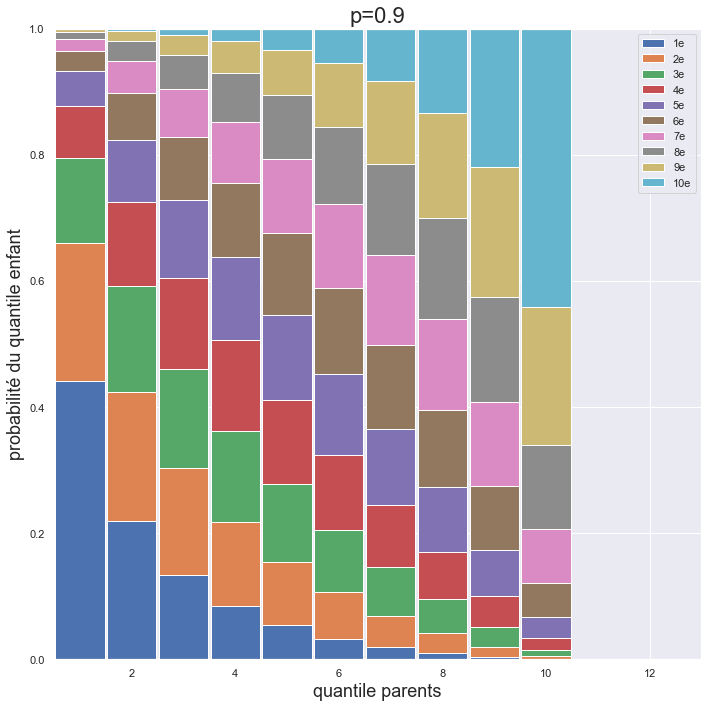

In [118]:
# Graphique pour une faible mobilité
plt.figure(figsize=(10,10))
cumul = np.array([0] * nombre_quantiles)
for i, child_quantile in enumerate(cd):
    plt.bar(np.arange(nombre_quantiles) + 1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) + 'e')
    cumul = cumul + np.array(child_quantile)
    
plt.axis([.5, nombre_quantiles*1.3 ,0 ,1])
plt.title('p=' + str(pj), fontsize=22)
plt.legend()
plt.xlabel('quantile parents', fontsize=18)
plt.ylabel('probabilité du quantile enfant', fontsize=18)
plt.tight_layout()

#plt.savefig('Faible_mobilité.png')
plt.show()

In [119]:
# Données pour une forte mobilité
pj1 = 0.1
y_child1, y_parents1 = generate_incomes(n, pj1)
sample1 = compute_quantiles(y_child1, y_parents1, nombre_quantiles)
cd1 = conditional_distributions(sample1, nombre_quantiles)
cd1

array([[0.1335 , 0.1186 , 0.11114, 0.10616, 0.1003 , 0.09566, 0.09284,
        0.08725, 0.08202, 0.07253],
       [0.1171 , 0.11068, 0.10744, 0.10423, 0.10143, 0.09849, 0.09594,
        0.09152, 0.0894 , 0.08377],
       [0.11073, 0.10556, 0.10511, 0.10228, 0.0994 , 0.09833, 0.09986,
        0.09642, 0.09347, 0.08884],
       [0.1062 , 0.10393, 0.1031 , 0.1017 , 0.10173, 0.09984, 0.09807,
        0.09877, 0.09371, 0.09295],
       [0.10078, 0.10183, 0.10057, 0.10211, 0.10119, 0.10027, 0.10005,
        0.09834, 0.09941, 0.09545],
       [0.09857, 0.09966, 0.09888, 0.10043, 0.10039, 0.10074, 0.10042,
        0.09981, 0.10093, 0.10017],
       [0.0928 , 0.09632, 0.0963 , 0.09794, 0.1009 , 0.10152, 0.10203,
        0.1036 , 0.10322, 0.10537],
       [0.08651, 0.09377, 0.09574, 0.09728, 0.09949, 0.10271, 0.10229,
        0.10449, 0.10765, 0.11007],
       [0.08099, 0.08943, 0.0933 , 0.09661, 0.09869, 0.10081, 0.10349,
        0.1084 , 0.11075, 0.11753],
       [0.07282, 0.08022, 0.08842, 0.

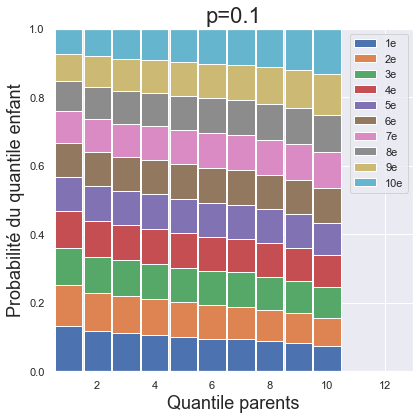

In [120]:
# Graphique pour une forte mobilité
plt.figure(figsize=(6,6))
cumul1 = np.array([0] * nombre_quantiles)
for i, child_quantile in enumerate(cd1):
    plt.bar(np.arange(nombre_quantiles) + 1, child_quantile, bottom=cumul1, width=0.95, label = str(i+1) + 'e')
    cumul1 = cumul1 + np.array(child_quantile)
    
plt.axis([.5, nombre_quantiles*1.3 ,0 ,1])
plt.title('p=' + str(pj1), fontsize=22)
plt.legend()
plt.xlabel('Quantile parents', fontsize=18)
plt.ylabel('Probabilité du quantile enfant', fontsize=18)
plt.tight_layout()

#plt.savefig('forte_mobilité.png')
plt.show()

In [121]:
# Exemple donnée par OC avec une forte mobilité 
c_i_child = 1
c_i_parent = 9
p = proba_cond(c_i_parent, c_i_child, cd)
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child, pj, p))


P(c_i_parent = 9 | c_i_child = 1, pj = 0.9) = 0.00426


In [122]:
# Exemple donnée par OC avec une forte mobilité 
c_i_child = 9
c_i_parent = 0
p = proba_cond(c_i_parent, c_i_child, cd)
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child, pj, p))


P(c_i_parent = 0 | c_i_child = 9, pj = 0.9) = 0.00082


In [123]:
# Exemple donnée par OC avec une faible mobilité 
c_i_child = 9
c_i_parent = 0
p = proba_cond(c_i_parent, c_i_child, cd1)
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child, pj1, p))


P(c_i_parent = 0 | c_i_child = 9, pj = 0.1) = 0.07282


In [124]:
# Exemple donnée par OC avec une faible mobilité 
c_i_child = 1
c_i_parent = 0
p = proba_cond(c_i_parent, c_i_child, cd1)
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child, pj1, p))


P(c_i_parent = 0 | c_i_child = 1, pj = 0.1) = 0.1171


## Effacement individus¶

In [125]:
simulation_classe_revenu

,ln_yparent,yparent,epsilon,ychild,ci_child,ci_parent
0,8.571277,5.277866e+03,-0.492199,1.369157e+03,3,4
1,16.854920,2.089290e+07,0.521429,6.523082e+06,10,10
2,8.932323,7.572837e+03,-0.392039,2.094462e+03,4,4
3,10.648118,4.211328e+04,-1.080320,4.929471e+03,5,6
4,10.251194,2.831634e+04,-0.468847,6.356466e+03,5,6
...,...,...,...,...,...,...
999995,10.424000,3.365781e+04,0.488069,1.933495e+04,7,6
999996,10.474027,3.538444e+04,-0.560129,7.090388e+03,5,6
999997,9.362487,1.164331e+04,-0.044339,4.367295e+03,5,5
999998,14.614132,2.222475e+06,2.053179,4.016406e+06,10,10


## Nouvel échantillon

In [126]:
%%time
data_new = pd.concat([world_income_elasticity] * 500)
data_new.head(2)

Wall time: 725 ms


,Pays,ISO3,population,quantile,nb_quantiles,income,gdpppp,gini,rank,region,incgroup4,group,elasticity
0,Albania,ALB,2947314,1,100,728.89795,7297.0,0.32141,25.0,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.815874
1,Albania,ALB,2947314,2,100,916.66235,7297.0,0.32141,25.0,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.815874


## Calcul des  𝑐𝑖,𝑝𝑎𝑟𝑒𝑛𝑡𝑠 ¶

In [127]:
# On réarrange le dataframe en ajoutant les informations 

data_new.rename(columns = {'quantile': 'ci_child', "income" : "ychild", 'elasticity': 'pj'}, inplace = True)
data_new.head()

,Pays,ISO3,population,ci_child,nb_quantiles,ychild,gdpppp,gini,rank,region,incgroup4,group,pj
0,Albania,ALB,2947314,1,100,728.89795,7297.0,0.32141,25.0,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.815874
1,Albania,ALB,2947314,2,100,916.66235,7297.0,0.32141,25.0,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.815874
2,Albania,ALB,2947314,3,100,1010.91600,7297.0,0.32141,25.0,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.815874
3,Albania,ALB,2947314,4,100,1086.90780,7297.0,0.32141,25.0,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.815874
4,Albania,ALB,2947314,5,100,1132.69970,7297.0,0.32141,25.0,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.815874


In [128]:
import math

def c_i_parents(ychild, pj, alpha = 0, nb_quantiles = 100):
    
    # Calcul de la taille de l'échantillon
    size = ychild.shape[0]
    
    # Je stocke mes ychild dans mon dataframe
    simulation_classe_revenu = pd.DataFrame(ychild).rename(columns = {"income" : "ychild"} )
    
    # Je calcule mes epsilons
    epsilon = np.random.randn(len(ychild))
    
    # Je calcule mes yparents
    yparent = [math.exp((math.log(x) - alpha - y)/pj) for x, y in zip (ychild, epsilon)]
    
    # j'associe en dico mes ci_parents
    dico_parent = {a:int(b) for a,b in zip(np.sort(yparent), np.round(np.arange(1, nb_quantiles + 1, nb_quantiles/size) -0.5 +1/size))}
    
    # je retourne en liste mes ci_parent
    return [dico_parent[x] for x in yparent]
    

In [129]:
# Je refais un dico avec les pj
dico_pj = {x:y for x,y in zip(data_new[["Pays", "pj"]].drop_duplicates().Pays,
                             data_new[["Pays", "pj"]].drop_duplicates().pj)}

In [130]:
%%time
centile_parents = np.array([], dtype = int)
for k in data_new.Pays.unique():
    centile_parents = np.append(centile_parents,
                                c_i_parents(data_new[data_new.Pays == k].ychild, dico_pj[k], alpha = 2),
                                axis = 0
                               )
centile_parents

Wall time: 20.4 s


array([18, 43, 15, ..., 97, 92, 98])

In [131]:
data_new["ci_parent"] = centile_parents
data_new.head(3)

,Pays,ISO3,population,ci_child,nb_quantiles,ychild,gdpppp,gini,rank,region,incgroup4,group,pj,ci_parent
0,Albania,ALB,2947314,1,100,728.89795,7297.0,0.32141,25.0,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.815874,18
1,Albania,ALB,2947314,2,100,916.66235,7297.0,0.32141,25.0,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.815874,43
2,Albania,ALB,2947314,3,100,1010.91600,7297.0,0.32141,25.0,Europe & Central Asia,Upper middle income,Europe & Central Asia Upper middle income,0.815874,15


In [132]:
data_new.loc[(data_new["ci_child"] == 5) & (data_new["ci_parent"] == 8)].sort_values("pj")

,Pays,ISO3,population,ci_child,nb_quantiles,ychild,gdpppp,gini,rank,region,incgroup4,group,pj,ci_parent
2304,Finland,FIN,5313399,5,100,6373.68700,33626.0,0.293918,13.0,High income,High income,High income High income,0.112876,8
2304,Finland,FIN,5313399,5,100,6373.68700,33626.0,0.293918,13.0,High income,High income,High income High income,0.112876,8
1804,Denmark,DNK,5493621,5,100,7245.25600,34130.0,0.277100,6.0,High income,High income,High income High income,0.145146,8
1804,Denmark,DNK,5493621,5,100,7245.25600,34130.0,0.277100,6.0,High income,High income,High income High income,0.145146,8
1804,Denmark,DNK,5493621,5,100,7245.25600,34130.0,0.277100,6.0,High income,High income,High income High income,0.145146,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,Ecuador,ECU,14535740,5,100,415.14374,7560.0,0.524633,67.0,Latin America & Caribbean,Upper middle income,Latin America & Caribbean Upper middle income,1.029957,8
2004,Ecuador,ECU,14535740,5,100,415.14374,7560.0,0.524633,67.0,Latin America & Caribbean,Upper middle income,Latin America & Caribbean Upper middle income,1.029957,8
1304,Colombia,COL,44254972,5,100,290.17600,8185.0,0.583437,72.0,Latin America & Caribbean,Upper middle income,Latin America & Caribbean Upper middle income,1.095440,8
1304,Colombia,COL,44254972,5,100,290.17600,8185.0,0.583437,72.0,Latin America & Caribbean,Upper middle income,Latin America & Caribbean Upper middle income,1.095440,8


## Suppression de ci_child

In [133]:
data_new1 = data_new[["Pays", "ISO3", "population", "nb_quantiles", "ychild",
                      "gdpppp", "gini", "rank","pj", "ci_parent"]]
data_new1

,Pays,ISO3,population,nb_quantiles,ychild,gdpppp,gini,rank,pj,ci_parent
0,Albania,ALB,2947314,100,728.89795,7297.00000,0.321410,25.0,0.815874,18
1,Albania,ALB,2947314,100,916.66235,7297.00000,0.321410,25.0,0.815874,43
2,Albania,ALB,2947314,100,1010.91600,7297.00000,0.321410,25.0,0.815874,15
3,Albania,ALB,2947314,100,1086.90780,7297.00000,0.321410,25.0,0.815874,7
4,Albania,ALB,2947314,100,1132.69970,7297.00000,0.321410,25.0,0.815874,7
...,...,...,...,...,...,...,...,...,...,...
7394,Congo Democratic Republic of the,COD,58453687,100,810.62330,303.19305,0.459403,58.0,0.707703,71
7395,Congo Democratic Republic of the,COD,58453687,100,911.78340,303.19305,0.459403,58.0,0.707703,91
7396,Congo Democratic Republic of the,COD,58453687,100,1057.80740,303.19305,0.459403,58.0,0.707703,97
7397,Congo Democratic Republic of the,COD,58453687,100,1286.60290,303.19305,0.459403,58.0,0.707703,92


## Dataframe final

In [134]:
data_ychild_mean = data_new1.groupby(by = ["Pays", "ISO3"]).agg({"ychild": "mean"}).reset_index()
data_ychild_mean = data_ychild_mean.rename(columns = {"ychild": "mj"})
data_ychild_mean

,Pays,ISO3,mj
0,Albania,ALB,2994.829902
1,Argentina,ARG,5847.884654
2,Armenia,ARM,1628.382785
3,Austria,AUT,16637.600204
4,Azerbaijan,AZE,2357.429023
...,...,...,...
69,Ukraine,UKR,3349.388306
70,United Kingdom,GBR,21709.604470
71,United States of America,USA,25503.581661
72,Uruguay,URY,5290.784920


In [135]:
data_ychild_mean[data_ychild_mean["ISO3"] == "USA"]

,Pays,ISO3,mj
71,United States of America,USA,25503.581661


In [136]:
# On fait un merge
final_data = pd.merge(data_new1,data_ychild_mean, left_on = ["Pays", "ISO3"], right_on = ["Pays", "ISO3"])
final_data.head(2)

,Pays,ISO3,population,nb_quantiles,ychild,gdpppp,gini,rank,pj,ci_parent,mj
0,Albania,ALB,2947314,100,728.89795,7297.0,0.32141,25.0,0.815874,18,2994.829902
1,Albania,ALB,2947314,100,916.66235,7297.0,0.32141,25.0,0.815874,43,2994.829902


In [137]:
final_data["ln_ychild"] = np.log(final_data["ychild"])
final_data["ln_mj"] = np.log(final_data["mj"])
final_data

,Pays,ISO3,population,nb_quantiles,ychild,gdpppp,gini,rank,pj,ci_parent,mj,ln_ychild,ln_mj
0,Albania,ALB,2947314,100,728.89795,7297.00000,0.321410,25.0,0.815874,18,2994.829902,6.591534,8.004643
1,Albania,ALB,2947314,100,916.66235,7297.00000,0.321410,25.0,0.815874,43,2994.829902,6.820739,8.004643
2,Albania,ALB,2947314,100,1010.91600,7297.00000,0.321410,25.0,0.815874,15,2994.829902,6.918612,8.004643
3,Albania,ALB,2947314,100,1086.90780,7297.00000,0.321410,25.0,0.815874,7,2994.829902,6.991092,8.004643
4,Albania,ALB,2947314,100,1132.69970,7297.00000,0.321410,25.0,0.815874,7,2994.829902,7.032359,8.004643
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3699495,Congo Democratic Republic of the,COD,58453687,100,810.62330,303.19305,0.459403,58.0,0.707703,71,276.016044,6.697803,5.620459
3699496,Congo Democratic Republic of the,COD,58453687,100,911.78340,303.19305,0.459403,58.0,0.707703,91,276.016044,6.815402,5.620459
3699497,Congo Democratic Republic of the,COD,58453687,100,1057.80740,303.19305,0.459403,58.0,0.707703,97,276.016044,6.963954,5.620459
3699498,Congo Democratic Republic of the,COD,58453687,100,1286.60290,303.19305,0.459403,58.0,0.707703,92,276.016044,7.159761,5.620459
